<p><img style="padding: 0 15px; float: left;" src="Graphs/FTLogo300.jpg" alt="FT Crusader Logo" Width='140' Height= '250'/></p> 
<p> <h2> Saint Paul (MN) 2019 City Council Election Voting Report: 11/07/19</h2> <a name="tc"></a>
<p> <h3> By Frogtown Crusader (Abu Nayeem)</h3>

## Table of contents <a name="content"></a>

**NOTE: Ranked Choice Voting (RCV) Analysis has been added & included in the candidate sections as well**

* [Brief Introduction](#intro)
* [About Saint Paul Open Data Initiative](#opendata)
* [Saint Paul: 2019 City Council Analysis](#sp)
    * [Voter Turnout](#turnout)
    * [Voter Increase](#increase)
    * [Early Voting Turnout](#early)
    * [Ranked Choice Voting](#rcv)
        * [Voter Participation](#participate)
        * [RCV Winner Breakdown by Ward Level](#rcvwinner)
    * [Trash Referendum](#trash)
    * [School Board](#school)
* [Precinct/Candidate Analysis:](#ward)
    * [Ward 1](#ward1)
        * [My Comments](#comment)
    * [Ward 2](#ward2)
    * [Ward 3](#ward3)
    * [Ward 4](#ward4)
    * [Ward 5](#ward5)
    * [Ward 6](#ward6)
    * [Ward 7](#ward7)
* [Concluding Thoughts](#conclusion) 
* [Run Code](#code)

### Brief Introduction <a name="intro"></a>

In this report, I will be using Minnesota Voting Data/Records mostly from the Minnesota Secretary of State Website to review Saint Paul 2019 elections. As part of the Saint Paul Open-Data Project, the coding will be accessible to everyone. This is mostly a data report; I'll just give a brief analysis for Ward 1, since I campaigned in that area. My concluding thoughts are my own. The ranked choice voting analysis can be a bit confusing in giving insight on voter behavior.

#### UPDATE: I have added the runner-up candidates info within their WARD

**Disclaimer:** I ran for Saint Paul city council for Ward 1 (election on November 5th, 2019). Unfortunately, I did not win the race, but I did get a decent number of votes even though I was going solo and focusing on reaching out to disenfranchised communities. For the 2015 city council report, I made a claim that there was systemic voter suppression in our election. You can view the full report [here](https://nbviewer.jupyter.org/github/sustainabu/OpenData_Saint_Paul/blob/master/_Saint%20Paul%20City%20Council%20Election%20Analysis/Saint%20Paul%202015%20City%20Council%20Voting%20Report_06-24-19.ipynb)

### Saint Paul Open Data Initiative <a name="opendata"></a>

This initiative focuses on taking public information/data from municipalities and organizations to create interactive reports and analysis to better inform and assist community members to take action. This is an open-source project, meaning that all coding is accessible to everyone, and thus there is transparency on the results. It is currently all python-based. As always, I encourage other programmers and developers to participate in making this more accessible. You can learn more information on the project [Github](https://github.com/sustainabu/OpenData_Saint_Paul) page as well as accessing documents.


**If you use any material/graphs from the report, please give credit to me and the project**

#### About the Data

I have used the following data sources for my report:
* For 2015 city council voter turnout, I used voting numbers from the 2015 City Council Report. It doesn't have the highest precision
* For 2019 city council results, a vast majority of information came from the [Minnesota Secretary of State website](https://electionresults.sos.state.mn.us/Results/MunicipalRaces/125?districtid=58000)
* For 2019 voter enrollment numbers with varying data, "Voter Registration Count By Precinct And District Data" ,you can get from [Ramsey County data portal](https://opendata.ramseycounty.us/Civic-Engagement/Voter-Registration-Count-By-Precinct-And-District-/8ykt-7qtm)
* For ranked choice voting numbers, I've contacted Ramsey County and gave me this [datafile](https://github.com/sustainabu/OpenData_Saint_Paul/blob/master/_Saint%20Paul%20City%20Council%20Election%20Analysis/Data/Raw%20Data%20Voter_Registration_Count_By_Precinct_And_District_Data.csv) ; 
    * **To Download: Press "Alt" and then left click the "Raw" button."**
* For the undervote numbers for each precinct and voting degradations, I've contacted Ramsey County and gave me this [pdffile](https://github.com/sustainabu/OpenData_Saint_Paul/blob/master/_Saint%20Paul%20City%20Council%20Election%20Analysis/Data/Raw%20Data_Precinct%20Results-11-7-2019%2015-03-27%20PM.pdf); 
    * **There should be a download button on the page**


## Saint Paul City Analysis  <a name="sp"></a>

### Overall turnout

Compared to 2015 city council elections, the voting turnout has doubled from 15.5% to 32.8%. The heated trash referendum may have gotten a lot of people into the polls. In addition, there was a total of 28 candidates running for positions and Saint Paul use ranked choice voting (RVC) in determining the winner, making it competitive. However, since I have been door-knocking all over Ward 1, I find it hard to believe that turnout has increased everywhere particularly at certain voting precincts, where there is high density. My hypothesis (or conspiracy theory) is that some Yes voters are renters and/or first generation immigrant families. From my own on the ground experience, renters in high density areas either do not care and/or not aware about the trash referendum at all because it simply does not impact their lives. I cannot imagine immigrants being knowledgeable of the subject unless being persuaded, though there was a strong concentration of immigrants in high density public housing. The key metric to look for is the Trash/Voting differential gap, density, and that even in non-competitive races in the Wards the voter turnout was massive. There are several ways to test this hypothesis, but I won't list all of them as it may impact my capacity to collect data if I choose to pursue this further.

**Updated: Ranked Choice Voting has been added**

When we add RCV we add an additional dimension on voter behavior and interest. However, it may be complicated to wrap one's head around it. I'll explain it in detail within the section. Note: The winning candidate from Ward 1 and Ward 6 won through a runoff election. 

**The summary results are below**: The LastCouncil_Vote% indicate the 2015 City Council Voting Percentage, and the 1st_Undervote% indicates the percentage of ballots where either not filled out correctly and/or purposely did not fill it out, such as the case to respond to the trash referendum and not cast a vote on city council.

In [124]:
Features= ['Ward', 'Reg_Vote_11/7/19', 'Early/Abs_Vote%', 'Tot_Vote%', 'LastElection_Vote%', 'LastElection_Diff%', 'Winner_1stVote%', '1st_Undervote%']

W19[Features]

Ward  Reg_Vote_11/7/19  Early/Abs_Vote%  Tot_Vote%  LastElection_Vote%  \
0     1             22055            11.90      29.99               12.73   
1     2             26997            11.07      30.08               18.78   
2     3             29128            12.71      45.45               17.89   
3     4             26288            10.75      37.93               19.85   
4     5             20308            14.62      28.96               17.81   
5     6             19913            11.17      28.65               10.43   
6     7             20820             6.91      22.04                8.59   

   LastElection_Diff%  Winner_1stVote%  1st_Undervote%  
0               17.26            42.29            3.18  
1               11.30            61.93            5.35  
2               27.56            60.55            3.04  
3               18.08            59.13            4.04  
4               11.15            53.21            3.80  
5               18.22            44.36            3.37  
6               13.45            61.69            7.80

The voter turnout has increased within all the wards, especially in Ward 3 probably due to a competitive election. Note: Since trash referendum is determined city-wide there are inequities on the representation of each precinct. The early Vote% was rather high across the wards, it's likely to occur where there is a lot of senior citizens.

### Saint Paul 2019 City Council Voter Turnout% <a name="turnout"></a>

In [2]:
map_2019_SP_Vote_byPrecinct(5)

NameError: name 'P_19' is not defined

### Saint Paul 2019 City Council Voter Increase% <a name="increase"></a>

In [232]:
map_2019_SP_VoteDiff_byPrecinct()

In [194]:
map_2019_SP_VoteDiff_byPrecinct(6)

### Saint Paul 2019 City Council Early/Absentee Voting% <a name="early"></a>

In [231]:
map_2019_SP_EarlyVote_byPrecinct()

## Ranked Choice Voting (RCV) in Saint Paul <a name="rcv"></a>

In Saint Paul, we are allowed to rank each candidate. A candidate is elected if they have at least 50% of votes + 1 vote. If 50% is not achieved in the first round, whoever received the lowest votes will be eliminated, and any proceeding ranking votes will then be distributed to the other candidates, i.e. runoff election. The image (courtesy of FairVote MN) below captures the process effectively.

<img src="Graphs/Ranked_Pic.jpg" alt="Drawing" style="width: 700px;"/>


RCV has many advantages and some disadvantages. In respect to individual choice, RCV allows citizens to support multiple candidates and the ability to support the underdog without feeling they are wasting their vote.  For candidates, they can form a coalition against the incumbent, likewise, citizens can do the same. The disadvantages of ranked choice voting is that for non-experienced voters the ballot may be overwhelming. Such instances can include, "it's too complicated, and so people don't vote", and language barriers in interpreting the ballot. It is important to note, that ranking your vote is **voluntary**.

**Data Limitations**

Unfortunately, Ramsey County does not collect individual ballot data, and provide only aggregate data by precinct (received from a data request). This means that the analysis on the voting numbers will be **data inferences**, which means that I will be making assumptions in my calculations. Because the data is aggregated, we do not know the following:

* The subsequent ranking of candidate supporters for the 2nd, and 3rd vote.
* The number of citizens that ranked the same candidate multiple times (i.e. ranked same candidate for 1st,2nd, 3rd choice)
* Using the undervote (i.e. unfilled ballot) alone, determine if ballot was not filled/ correct because of confusion and/or citizen voted only on trash referendum
* Assume that the "write-in" selection is negligible
* For most electoral races there, on the ballot; the total number of selection is the "number of candidates running" plus one option. Only Ward 6, had the number of candidates equal the selection item.  

<img src="Graphs/Ranked_Pic.jpg" alt="Drawing" style="width: 700px;"/>


Finally for simplifications:
* I have limited the ranked choice selection up to the third choice in the ballot AND the last-vote (this shows interesting behavior)

### Saint Paul 2019 City Council: RCV Voter Participation <a name="participate"></a>

First, let's discuss about **voter registration on election day** and  **voter participation**, which is the total number of citizens that cast a ballot, which can be further broken down to their ranked voting via the **undervote** numbers. Given the outreach efforts for the trash referendum, we may expect considerable voter registration within a short period of time. For the undervotes at multiple ranked layers, the standard method is to just measure the number of ballots not made; however, more information can be obtained about voter's behavior if we condition on previous results. I explain my logic/approach when explaining the variables below for the accompanying data


* **Reg_Vote_11/7/19:** The most accurate voter registry just after the election
* **VoterReg_Election:** This is the difference of voter registry from 10/1/19 to 11/7/19; More insight at precinct level
* **Total_Ballot:** The total number of ballots, which include the casted ballots and undervotes (no candidate chosen)
* **1st_Undervote%:** The percentage of total ballots that city council ballot was not filled at all for the first choice
* **2nd_Undervote%:** The percentage of total ballots that city council ballot was not filled at all for the second choice
* **2nd_Cond_Undervote%:** The percentage of voters that made first-choice, but NOT a second choice 
* **3rd_Undervote%:** The percentage of total ballots that city council ballot was not filled at all for the third choice
* **3rd_Cond_Undervote%:** The percentage of voters that made second-choice, but NOT a third choice 
* **Tot_LastVote:** The total number of votes where the last choice is filled. This is an interesting metric because technically (assuming no-write in), filling out the **last two columns is unnecessary** (last column for ward 6). See the table to see where the last choice filled under.
<img src="Graphs/LastVote.png" alt="Drawing" style="width: 700px;"/>
* **Tot_Cond_LastVote%:** The percentage of voters (from first-choice voters) that filled the final selection. This is an indirect method of how informed voters are about RCV (i.e. either filled out the same candidate and/or don't understand it)



In [143]:
Und19

Ward  Reg_Vote  VoterReg_Election  Total_Vote  Tot_Vote%  Total_Ballot  \
0     1     22055                131        6614      29.99          6831   
1     2     26997                162        8121      30.08          8580   
2     3     29128                 50       13238      45.45         13653   
3     4     26288                 20        9972      37.93         10392   
4     5     20308                162        5881      28.96          6113   
5     6     19913                145        5705      28.65          5904   
6     7     20820                 70        4589      22.04          4977   

   1st_Undervote  1st_Undervote%  2nd_Undervote  2nd_Undervote%  \
0            217            3.18           1627           23.82   
1            459            5.35           3582           41.75   
2            415            3.04              0            0.00   
3            420            4.04           3602           34.66   
4            232            3.80           1637           26.78   
5            199            3.37           1250           21.17   
6            388            7.80           1744           35.04   

   2nd_Cond_Undervote%  3rd_Undervote  3rd_Undervote%  3rd_Cond_Undervote%  \
0                21.32           2870           42.01                23.89   
1                38.46           5153           60.06                31.43   
2                 0.00              0            0.00                 0.00   
3                31.91              0            0.00                -2.89   
4                23.89           2606           42.63                21.65   
5                18.42           2217           37.55                20.78   
6                29.55           2365           47.52                19.21   

   Tot_LastVote  Tot_Cond_LastVote%  
0          1272               19.23  
1          1359               16.73  
2          4742               35.82  
3          1547               15.51  
4          1598               27.17  
5          2363               41.42  
6          1401               30.53

### Saint Paul 2019 City Council First-Choice Undervote Map 
* **LEGEND: The percentage of voters that did NOT make first-choice selection for city council ballot.** 

In [145]:
map_2019_SP_Under1Vote_byPrecinct()

### Saint Paul 2019 City Council Second-Choice Conditional Undervote Map 
* **LEGEND: The percentage of first-choice voters that did NOT make a second-choice selection for city council ballot.** 
* Ward 3 was excluded because there was only two candidates running for office


In [226]:
map_2019_SP_Under2Vote_byPrecinct()

### Saint Paul 2019 City Council Last-Choice Conditional Voting Map 
* **LEGEND: The percentage of first-choice voters that made a last-choice selection for city council** 
* Ward 6 had the most candidates and had one less vacant option available


In [147]:
map_2019_SP_LastVote_byPrecinct()

**Brief Analysis:** There seems to be evidence from the 1st Undervote Map there is significant portion that did not vote for city council, but likely trash. There are many precincts in Ward 2 that had voters not fill a second choice. The lastvote map would seem to indicate that people are misinformed how ranked-choice voting work even in the wealthier areas of Ward 2.

### Saint Paul 2019 City Council: RCV Winner Breakdown <a name="rcvwinner"></a>

In this section, I will explain how I evaluate the ranked choices for the winning candidate. Just like in the earlier section, I think it is best explained by the variables themselves. Note: Exclusivity assumes that voters don't vote for a candidate more than once. 

* **Cand_1st_Vote:** The total number of first-choice votes for candidates
* **Winner_1stVote%:** The percentage of first-choice ballots obtained
* **Cand_1st_2ndVote:** The total number of second-choice votes for candidates
* **Winner_Cond_2ndVote%:** The percentage of second-choice ballots excluding people that have voted for them on first-choice. Assumes exclusivity
* **Cand_1st_3rdVote:** The total number of third-choice votes for candidates
* **Winner_Cond_3rdVote%:** The percentage of second-choice ballots excluding people that have voted for them on first OR second choice. Assumes exclusivity
* **Ballot_3rdSurplus:** The number of voters that did not vote for the candidates in the first three choices. If negative, that means the exclusivity claim was significantly violated where voters ranked the same candidate multiple times

To reduce column length, I have further abbreviated the columns; it is implicit the results are of the winner of each race 

#### Saint Paul 2019 City Council RCV results for winning candidate

In [202]:
Win19.columns

Features= ['Ward', 'Tot_Vote', '1st_Vote', '1stVote%', '2ndVote', 'Cond_2ndVote%', 'Ballot_3rdSurplus', 'LastVote','Cond_LastVote%']
Win19[Features]


Ward  Tot_Vote  1st_Vote  1stVote%  2ndVote  Cond_2ndVote%  \
0     1      6614      2797     42.29     1433          37.54   
1     2      8121      5029     61.93     1319          42.66   
2     3     13238      8015     60.55        0           0.00   
3     4      9972      5896     59.13     1893          46.44   
4     5      5881      3129     53.21     1158          42.08   
5     6      5705      2531     44.36     1556          49.02   
6     7      4589      2831     61.69     1247          70.93   

   Ballot_3rdSurplus  LastVote  Cond_LastVote%  
0               1202       501           17.91  
1                870       536           10.66  
2                  0      2612           32.59  
3               2183       646           10.96  
4                704       683           21.83  
5                740       629           24.85  
6               -462       763           26.95

In [199]:
Win19

Ward  Tot_Vote  1st_Vote  1stVote%  2ndVote  Cond_2ndVote%  3rdVote  \
0     1      6614      2797     42.29     1433          37.54     1182   
1     2      8121      5029     61.93     1319          42.66      903   
2     3     13238      8015     60.55        0           0.00        0   
3     4      9972      5896     59.13     1893          46.44        0   
4     5      5881      3129     53.21     1158          42.08      890   
5     6      5705      2531     44.36     1556          49.02      878   
6     7      4589      2831     61.69     1247          70.93      973   

   Cond_3rdVote%  Ballot_3rdSurplus  LastVote  Cond_LastVote%  
0          49.58               1202       501           17.91  
1          50.93                870       536           10.66  
2           0.00                  0      2612           32.59  
3           0.00               2183       646           10.96  
4          55.83                704       683           21.83  
5          54.26                740       629           24.85  
6         190.41               -462       763           26.95

#### Analysis

From the table above, there are several things that stands out immediately. In ward 7, the conditional ranking vote is over 190% and the surplus is -462. This indicates that Ward 7 winner Jane Prince, in aggregation, was in every voter's ballot within the top 3 choices, and was repeated 462 times. In ward 7, the undervote at the first choice is high indicating that likely many residents just voted on the trash referendum and not the candidate. The ballot surplus numbers indicate that Ward 1 was a close race. In Ward 6, there were six candidates running, so for winner, Nelsie Yang, to get close to 50% of 2nd choice ballots is impressive (though the run-off ballot says otherwise). When we break the numbers by precinct level, we will get more interesting results. The high lastvote rate for Ward 3 should be evident that residents do not necessarily understand how ranked choice voting works especially in a two candidate race. **Finally, I provide this information to each candidate in the ward section!**

## Trash Referendum  <a name="trash"></a>

During election day, Saint Paul citizens had the option to repeal an ordinance that set up the payment structure for organized trash. For my candidacy, I had a firm 'NO' stance on the trash referendum. The trash debate itself was very heated across the city. How much did it influence in getting people out to vote, and did it help out city council members? The alignment columns help answer this question 

Non-Intuitive Columns:
* Trash_Vote_Diff: This indicates the difference between the number of votes on trash versus the ballot. If negative, it means that is the number of people the net number of people that did not vote on trash issue, but voted city council. If positive, the net number of people that voted exclusively on the trash issue, and not the city council race
* NO_Cand1st_Vote: It's the number of first votes received by candidates that aligned with the No vote. 
* No_Cand_Align: Did the 'No' voters vote for the No candidate?; If negative, then they have not. If positive, they likely have given support to candidate

The Candidate position and their names are below:

<img src="Graphs/CityCouncilCandList.png" alt="Drawing" style="width: 700px;"/>


Here are the summary stats below:

In [140]:
TFeatures=['Ward','Trash_No', 'Trash_Total','Trash_No%','Trash_Vote_Diff', 'NO_Cand1st_Vote ', 'No_Cand_Align',  'YES_Cand1st_Vote ', 'Yes_Cand_Align']
W19[TFeatures]

Ward  Trash_No  Trash_Total  Trash_No%  Trash_Vote_Diff  NO_Cand1st_Vote   \
0     1      2328         6532      35.64              -82               504   
1     2      3222         8343      38.62              222              2763   
2     3      4410        13444      32.80              206              5168   
3     4      2783        10180      27.34              208              4035   
4     5      2547         5876      43.35               -5              2714   
5     6      2645         5504      48.06             -201              1585   
6     7      2539         4767      53.26              178              2831   

   No_Cand_Align  YES_Cand1st_Vote   Yes_Cand_Align  
0          -1824               6076            1872  
1           -459               5029             -92  
2            758               8015           -1019  
3           1252               5896           -1501  
4            167               3129            -200  
5          -1060               4101            1242  
6            292               2831             603

It is pretty evident that the trash issue brought out a significant number of voters as the Trash_Vote_Diff is not large, which is shocking for some wards especially the ones with high density. Also Ward 3 has a large pool of voters. In addition, personally, I did not benefit aligning with 'No' on the trash position; neither did candidates in Ward 6. The 'No' candidates in the other wards, were effective in aligning their campaign to the cause.

Finally, the map breaks down the 'No' Vote percentage. It's worth mentioning the irony is that the more disenfranchised communities were more likely to vote 'No', and the map suggests there are some oddities in high density areas.

In [184]:
map_2019_SP_Trash_byPrecinct()

The map below shows the normalized representation on which precincts had the greatest weight

In [185]:
#this is normalized
map_2019_SP_TrashRepresentation_byPrecinct()

In [198]:
map_2019_SP_TrashUndervote_byPrecinct(6)

### 2019 Saint Paul Public School Board Election <a name="school"></a>

Similar to the trash referendum, the school board is determined city-wide, and thus greater weight is placed on Ward 3 again. All the DFL candidates (Chauntyl Allen, Zuki Ellis, Steve Marchese) and Jessica Kopp were elected on seat of the school board. The School Board Vote numbers were determined by taking the total number of votes and divided by four.

Non-Intuitive Columns:
* SchoolBoard_Vote: sum the total number of votes for all candidates divided by 4. This is an underestimate of the number of voters
* Min_DFL(endorse): This is the minimum vote of the three DFL candidates. It tries to capture if all three candidates are voted 
* SchoolBoard_Vote%: From the total votes, the percentage that voted on schoolboard. This is an underestimate
* DFL_Vote%: From the schoolboard votes, the percentage that voted align with DFL Candidates. 
 

In [147]:
SFeatures=['Ward','Total_Vote','SchoolBoard_Vote', 'Min_DFL(endorse)', 'SchoolBoard_Vote%', 'DFL_Vote%']
W19[SFeatures]

Ward  Total_Vote  SchoolBoard_Vote  Min_DFL(endorse)  SchoolBoard_Vote%  \
0     1        6614           4259.00              2297              64.39   
1     2        8121           5248.25              2917              64.63   
2     3       13238           8675.25              4663              65.53   
3     4        9972           6994.00              4241              70.14   
4     5        5881           3769.25              1902              64.09   
5     6        5705           3109.00              1324              54.50   
6     7        4589           2838.75              1238              61.86   

   DFL_Vote%  
0      53.93  
1      55.58  
2      53.75  
3      60.64  
4      50.46  
5      42.59  
6      43.61

From the table above, it should be clear who determines the school board election. Are the other wards and precincts being represented? The map below is normalized.

In [186]:
map_2019_SP_SchoolRepresentation_byPrecinct()

## Ward Analysis <a name="ward"></a>

There will be several sections for each Ward, and will be through this outline.
**It is important you read the RCV section to variables**

1) General Election:
* Map: Precinct Representation
* Map:Voter Increase from last election
* Table: General Election 
* Map: Winner Precinct 
* Table/Map: Other Candidate Table/Map by descending order

2) Trash Referendum
* Map: No Vote%
* Table: General Trash



## Ward 1 Precinct Analysis <a name="ward1"></a>

<img src="Graphs/Ward1 Map.png" alt="Drawing" style="width: 700px;"/>

### W1 Precinct Representation Map

In [187]:
map_2019_SP_Representation_byPrecinct(1)

### W1 Voter Increase Map

In [188]:
map_2019_SP_VoteDiff_byPrecinct(1)

### W1 General Election Table

Ward 1 had a reallocation process where majority of second & third choice of the defeated candidates went to Anika Bowie, but that was insufficient in overcoming incumbent, Dai Thao's lead. In addition, there was 384 voters between Liz and Abu that did not vote for any of the two remaining candidates. **Dai Thao got above the threshold by 2 votes!!!** (unless they would change the target rate). The graphic below illustrates this.

<img src="Graphs/Ward1Fin.png" alt="Drawing" style="width: 700px;"/>


From the table below, I believe the "1st_UnderVote%' is higher for Precinct 15 because people wanted to cast ballot on trash exclusively. There seems to be higher likelihood of choosing only first choice in the disenfranchised communities (P10 & P14).

In [149]:
G19.query('Ward==1')

Ward  Precinct  Reg_Voters  Reg_ElectDay  Tot_Vote  Early_Vote%  \
0      1   W-1 P-1        1193            23       569         6.85   
1      1   W-1 P-2        2201            16       778        16.20   
2      1   W-1 P-3        1929            15       491         7.54   
3      1   W-1 P-4        1396             7       359        10.86   
4      1   W-1 P-5        1385             9       357         9.52   
5      1   W-1 P-6        2825            15       924         8.44   
6      1   W-1 P-7        1502             7       665         9.17   
7      1   W-1 P-8        2138            -2       636        12.11   
8      1   W-1 P-9        2383            16       460        11.52   
9      1  W-1 P-10         470             1        98         7.14   
10     1  W-1 P-11        1155            12       218        20.18   
11     1  W-1 P-12         337             2       149        16.78   
12     1  W-1 P-13        1170            -4       433        15.94   
13     1  W-1 P-14         982             7       251        21.91   
14     1  W-1 P-15         745            14       155        17.42   
15     1  W-1 P-16         244            -7        71        22.54   

    LastCouncil_Vote%  Tot_Vote%  Representation  1st_UnderVote%  \
0               24.78      47.69            3.19            3.72   
1               13.10      35.35            1.78            2.99   
2                9.71      25.45           -1.33            3.35   
3               10.57      25.72           -0.90            1.64   
4               11.29      25.78           -0.88            1.11   
5               12.51      32.71            1.16            2.12   
6               18.28      44.27            3.24            3.06   
7               12.79      29.75           -0.07            3.34   
8                8.18      19.30           -3.85            2.13   
9                7.92      20.85           -0.65            3.92   
10              11.53      18.87           -1.94            6.03   
11              20.12      44.21            0.72            6.29   
12              15.42      37.01            1.25            3.78   
13              13.62      25.56           -0.66            3.83   
14               5.29      20.81           -1.04            8.28   
15              13.19      29.10           -0.04            2.74   

    2nd_Cond_UnderVote%  LastVote%  
0                 20.74       7.38  
1                 25.58      15.30  
2                 20.77      14.87  
3                 16.16      32.31  
4                 17.65      30.53  
5                 18.07      14.61  
6                 21.35       8.87  
7                 16.82      20.13  
8                 28.26      31.09  
9                 37.76      17.35  
10                27.06      39.45  
11                23.49      14.77  
12                18.24      16.86  
13                29.48      43.03  
14                19.35      16.77  
15                14.08      22.54

### W1 Winner (Dai Thao)

In [190]:
map_2019_SP_Winner_byPrecinct(1)

In [150]:
C119.query('Ward==1')

Ward  Precinct  Reg_Voters  Tot_Vote%  1stVote  1stVote%  2ndVote  \
0      1   W-1 P-1        1193      47.69      228     40.07      107   
1      1   W-1 P-2        2201      35.35      389     50.00      151   
2      1   W-1 P-3        1929      25.45      178     36.25      113   
3      1   W-1 P-4        1396      25.72      154     42.90       84   
4      1   W-1 P-5        1385      25.78      105     29.41       78   
5      1   W-1 P-6        2825      32.71      309     33.44      184   
6      1   W-1 P-7        1502      44.27      274     41.20      134   
7      1   W-1 P-8        2138      29.75      233     36.64      133   
8      1   W-1 P-9        2383      19.30      246     53.48      113   
9      1  W-1 P-10         470      20.85       40     40.82       18   
10     1  W-1 P-11        1155      18.87       78     35.78       49   
11     1  W-1 P-12         337      44.21       69     46.31       43   
12     1  W-1 P-13        1170      37.01      226     52.19      108   
13     1  W-1 P-14         982      25.56      167     66.53       68   
14     1  W-1 P-15         745      20.81       71     45.81       33   
15     1  W-1 P-16         244      29.10       30     42.25       17   

    Cond_2ndVote%  3rdVote  Cond_3rdVote%  Ballot_Surplus  Cond_LastVote%  
0           31.38       96          41.03             138            9.65  
1           38.82      135          56.72             103           12.85  
2           36.10       84          42.00             116           14.04  
3           40.98       79          65.29              42           31.17  
4           30.95       52          29.89             122           30.48  
5           29.92      134          31.09             297           10.36  
6           34.27      125          48.64             132            9.12  
7           33.00      121          44.81             149           18.88  
8           52.80       88          87.13              13           29.27  
9           31.03       15          37.50              25            7.50  
10          35.00       40          43.96              51           38.46  
11          53.75       21          56.76              16           18.84  
12          52.17       91          91.92               8           15.93  
13          80.95       60         375.00             -44           30.54  
14          39.29       25          49.02              26           15.49  
15          41.46       16          66.67               8           23.33

### W1 Anika Bowie

Note: In precinct 5, she actually had a surplus of votes

In [5]:
map_2019_SP_2nd_byPrecinct(1)

In [151]:
C219.query('Ward==1')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
0      1   W-1 P-1        1193       569      47.69      135     23.73   
1      1   W-1 P-2        2201       778      35.35      171     21.98   
2      1   W-1 P-3        1929       491      25.45      203     41.34   
3      1   W-1 P-4        1396       359      25.72      105     29.25   
4      1   W-1 P-5        1385       357      25.78      191     53.50   
5      1   W-1 P-6        2825       924      32.71      408     44.16   
6      1   W-1 P-7        1502       665      44.27      175     26.32   
7      1   W-1 P-8        2138       636      29.75      213     33.49   
8      1   W-1 P-9        2383       460      19.30      102     22.17   
9      1  W-1 P-10         470        98      20.85       22     22.45   
10     1  W-1 P-11        1155       218      18.87       89     40.83   
11     1  W-1 P-12         337       149      44.21       37     24.83   
12     1  W-1 P-13        1170       433      37.01       78     18.01   
13     1  W-1 P-14         982       251      25.56       35     13.94   
14     1  W-1 P-15         745       155      20.81       33     21.29   
15     1  W-1 P-16         244        71      29.10       16     22.54   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
0       167          38.48       72          26.97            6.67  
1       207          34.10      125          31.25           18.71  
2       105          36.46       74          40.44           13.30  
3       107          42.13       56          38.10           32.38  
4       131          78.92       77         220.00           31.41  
5       300          58.14      163          75.46           18.63  
6       185          37.76       83          27.21            8.00  
7       173          40.90      110          44.00           21.13  
8       100          27.93       64          24.81           41.18  
9        16          21.05       12          20.00           27.27  
10       56          43.41       42          57.53           39.33  
11       32          28.57       19          23.75           10.81  
12      115          32.39       59          24.58           16.67  
13       40          18.52       30          17.05           57.14  
14       37          30.33       26          30.59           21.21  
15       15          27.27       10          25.00            6.25

### W1 Liz de La Torre

In [7]:
map_2019_SP_3rd_byPrecinct(1)

In [152]:
C319.query('Ward==1')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
0      1   W-1 P-1        1193       569      47.69      168     29.53   
1      1   W-1 P-2        2201       778      35.35      177     22.75   
2      1   W-1 P-3        1929       491      25.45       69     14.05   
3      1   W-1 P-4        1396       359      25.72       65     18.11   
4      1   W-1 P-5        1385       357      25.78       45     12.61   
5      1   W-1 P-6        2825       924      32.71      137     14.83   
6      1   W-1 P-7        1502       665      44.27      165     24.81   
7      1   W-1 P-8        2138       636      29.75      144     22.64   
8      1   W-1 P-9        2383       460      19.30       63     13.70   
9      1  W-1 P-10         470        98      20.85       17     17.35   
10     1  W-1 P-11        1155       218      18.87       24     11.01   
11     1  W-1 P-12         337       149      44.21       29     19.46   
12     1  W-1 P-13        1170       433      37.01      100     23.09   
13     1  W-1 P-14         982       251      25.56       20      7.97   
14     1  W-1 P-15         745       155      20.81       24     15.48   
15     1  W-1 P-16         244        71      29.10       19     26.76   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
0       141          35.16       68          26.15            3.57  
1       157          26.12      100          22.52           12.43  
2       104          24.64       85          26.73           14.49  
3        72          24.49       63          28.38           30.77  
4        52          16.67       55          21.15           28.89  
5       197          25.03      136          23.05            9.49  
6       151          30.20       87          24.93            6.67  
7       162          32.93       97          29.39           15.28  
8        67          16.88       66          20.00           22.22  
9        12          14.81       11          15.94           17.65  
10       34          17.53       21          13.13           41.67  
11       29          24.17       23          25.27            6.90  
12      101          30.33       60          25.86           16.00  
13       38          16.45       32          16.58           80.00  
14       32          24.43       23          23.23           16.67  
15       15          28.85       13          35.14           10.53

### W1 Abu Nayeem

The number of 2nd and 3rd ranked votes are uniformly higher

In [8]:
map_2019_SP_4th_byPrecinct(1)

In [153]:
C419.query('Ward==1')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
0      1   W-1 P-1        1193       569      47.69       33      5.80   
1      1   W-1 P-2        2201       778      35.35       38      4.88   
2      1   W-1 P-3        1929       491      25.45       40      8.15   
3      1   W-1 P-4        1396       359      25.72       35      9.75   
4      1   W-1 P-5        1385       357      25.78       16      4.48   
5      1   W-1 P-6        2825       924      32.71       66      7.14   
6      1   W-1 P-7        1502       665      44.27       47      7.07   
7      1   W-1 P-8        2138       636      29.75       43      6.76   
8      1   W-1 P-9        2383       460      19.30       45      9.78   
9      1  W-1 P-10         470        98      20.85       18     18.37   
10     1  W-1 P-11        1155       218      18.87       26     11.93   
11     1  W-1 P-12         337       149      44.21       13      8.72   
12     1  W-1 P-13        1170       433      37.01       27      6.24   
13     1  W-1 P-14         982       251      25.56       28     11.16   
14     1  W-1 P-15         745       155      20.81       23     14.84   
15     1  W-1 P-16         244        71      29.10        6      8.45   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
0        31           5.78       69          13.66           15.15  
1        60           8.11       81          11.91           39.47  
2        66          14.63       62          16.10           27.50  
3        38          11.73       55          19.23           40.00  
4        33           9.68       42          13.64           25.00  
5        72           8.39      107          13.61           21.21  
6        49           7.93       70          12.30           19.15  
7        57           9.61       73          13.62           39.53  
8        46          11.08       55          14.91           33.33  
9        14          17.50       13          19.70           27.78  
10       19           9.90       34          19.65           42.31  
11        9           6.62       17          13.39           23.08  
12       28           6.90       39          10.32           29.63  
13       30          13.45       33          17.10           75.00  
14       19          14.39       20          17.70           17.39  
15       14          21.54       11          21.57          100.00

### W1 Trash Referendum

In [192]:
map_2019_SP_Trash_byPrecinct(1)

In [193]:
T19.query('Ward==1')

Ward             Precinct  Trash_No  Trash_Total  Trash_No%  \
0      1   Saint Paul W-1 P-1       151          582      25.95   
1      1   Saint Paul W-1 P-2       203          764      26.57   
2      1   Saint Paul W-1 P-3       176          483      36.44   
3      1   Saint Paul W-1 P-4       139          349      39.83   
4      1   Saint Paul W-1 P-5       172          349      49.28   
5      1   Saint Paul W-1 P-6       321          911      35.24   
6      1   Saint Paul W-1 P-7       211          667      31.63   
7      1   Saint Paul W-1 P-8       212          639      33.18   
8      1   Saint Paul W-1 P-9       213          451      47.23   
9      1  Saint Paul W-1 P-10        55           93      59.14   
10     1  Saint Paul W-1 P-11        86          205      41.95   
11     1  Saint Paul W-1 P-12        54          156      34.62   
12     1  Saint Paul W-1 P-13       163          439      37.13   
13     1  Saint Paul W-1 P-14        54          214      25.23   
14     1  Saint Paul W-1 P-15        88          157      56.05   
15     1  Saint Paul W-1 P-16        30           73      41.10   

    Trash_Vote_Diff  NO_Cand1st_Vote   No_Cand_Align  
0                13                33           -118  
1               -14                38           -165  
2                -8                40           -136  
3               -10                35           -104  
4                -8                16           -156  
5               -13                66           -255  
6                 2                47           -164  
7                 3                43           -169  
8                -9                45           -168  
9                -5                18            -37  
10              -13                26            -60  
11                7                13            -41  
12                6                27           -136  
13              -37                28            -26  
14                2                23            -65  
15                2                 6            -24

## My Comments <a name="comment"></a>

The previous incumbent, Dai Thao, will likely win the upcoming election. It shouldn't be a surprise that his strongest came from the precincts with large Hmong population, and there high density elderly homes in those areas. I've door-knocked in the area. I'm sure the second place candidate, Anika Bowie, has a strong contingency in certain precincts over others. In my original assessment, I predicted the election will follow through the cultural/geographical identity base; both the voting numbers and campaign events will strengthen this claim. It's sad to see voting precinct 9 continues to have the lowest turnout of voters, I doorknocked in the area in three separate occasions.

We see a huge increase in voters in already well-off communities, this could be a result of the trash referendum as their property taxes were "said" to increase if the "Vote No" succeed. It is no surprise that that there is more support for the trash referendum at the North End area compared to the other precincts, as many of the community members do not trust the city. It's shocking to see Mt. Airy to be heavily "Vote Yes" because many of the residents are not aware of trash, nor how it impacts them. I predict the elderly, disabled, and immigrant population have been 'persuaded' to Vote Yes on the trash referendum. The last weekend I have have been doorknocking in the apartments, and no one really cared and/or mentioned the trash issue. Before making such a case, I think it's important to lay down an argument via data. 

## Ward 2 Precinct Analysis <a name="ward2"></a>

<img src="Graphs/Ward2 Map.png" alt="Drawing" style="width: 700px;"/>

### W2 Precinct Representation Map

In [194]:
map_2019_SP_Representation_byPrecinct(2)

### W2 Voter Increase Map

In [195]:
map_2019_SP_VoteDiff_byPrecinct(2)

### W2 General Election Table

In [154]:
G19.query('Ward==2')

Ward  Precinct  Reg_Voters  Reg_ElectDay  Tot_Vote  Early_Vote%  \
16     2   W-2 P-1        1606             2       703         9.25   
17     2   W-2 P-2        1707            16       748         7.62   
18     2   W-2 P-3        2718            13       836        12.56   
19     2   W-2 P-4        1553             8       503        10.54   
20     2   W-2 P-5        2416            18       823         8.14   
21     2   W-2 P-6         624             4       192        10.42   
22     2   W-2 P-7        2279             8       617        12.64   
23     2   W-2 P-8        1314            66       285        25.61   
24     2   W-2 P-9        2075            11       574         8.89   
25     2  W-2 P-11        2941            14       702        13.82   
26     2  W-2 P-12        1763            -3       665         7.82   
27     2  W-2 P-13        1544            -2       495        16.36   
28     2  W-2 P-14        1703            -7       487         8.83   
29     2  W-2 P-15        2754            14       491        11.61   

    LastCouncil_Vote%  Tot_Vote%  Representation  1st_UnderVote%  \
16              27.63      43.77            2.71            4.61   
17              27.22      43.82            2.89            5.67   
18              17.35      30.76            0.22            8.53   
19              19.62      32.39            0.44            5.09   
20              22.56      34.06            1.18            6.69   
21              17.25      30.77            0.05            4.95   
22              17.09      27.07           -0.84            5.51   
23              12.96      21.69           -1.36            6.56   
24              18.37      27.66           -0.62            1.54   
25              12.35      23.87           -2.25            2.09   
26              25.79      37.72            1.66            5.67   
27              23.13      32.06            0.38            6.07   
28              18.21      28.60           -0.31            5.62   
29              11.27      17.83           -4.15            4.84   

    2nd_Cond_UnderVote%  LastVote%  
16                47.65       9.10  
17                43.45      14.71  
18                33.13      24.76  
19                51.69       5.77  
20                29.40      24.30  
21                36.46      20.83  
22                38.41      14.26  
23                29.82      24.21  
24                39.72       8.89  
25                46.44       8.12  
26                46.17       7.97  
27                30.10      24.85  
28                28.34      24.02  
29                29.33      30.75

### W2 Winner Rebecca Noecker 

In [197]:
map_2019_SP_Winner_byPrecinct(2)

In [155]:
C119.query('Ward==2')

Ward  Precinct  Reg_Voters  Tot_Vote%  1stVote  1stVote%  2ndVote  \
16     2   W-2 P-1        1606      43.77      498     70.84      121   
17     2   W-2 P-2        1707      43.82      537     71.79      138   
18     2   W-2 P-3        2718      30.76      483     57.78      148   
19     2   W-2 P-4        1553      32.39      340     67.59       45   
20     2   W-2 P-5        2416      34.06      444     53.95      151   
21     2   W-2 P-6         624      30.77      115     59.90       29   
22     2   W-2 P-7        2279      27.07      378     61.26      110   
23     2   W-2 P-8        1314      21.69      151     52.98       60   
24     2   W-2 P-9        2075      27.66      387     67.42       84   
25     2  W-2 P-11        2941      23.87      488     69.52       87   
26     2  W-2 P-12        1763      37.72      400     60.15       77   
27     2  W-2 P-13        1544      32.06      282     56.97       94   
28     2  W-2 P-14        1703      28.60      241     49.49       78   
29     2  W-2 P-15        2754      17.83      285     58.04       97   

    Cond_2ndVote%  3rdVote  Cond_3rdVote%  Ballot_Surplus  Cond_LastVote%  
16          59.02       67          79.76              17            6.63  
17          65.40      105         143.84             -32           12.66  
18          41.93      105          51.22             100           15.73  
19          27.61       31          26.27              87            4.41  
20          39.84      103          45.18             125           14.86  
21          37.66       19          39.58              29           10.43  
22          46.03       72          55.81              57            8.20  
23          44.78       39          52.70              35           19.87  
24          44.92       55          53.40              48            5.94  
25          40.65       46          36.22              81            3.89  
26          29.06       52          27.66             136            6.50  
27          44.13       76          63.87              43           16.67  
28          31.71       60          35.71             108           14.52  
29          47.09       73          66.97              36           19.30

### W2 Bill Hosko

In [35]:
map_2019_SP_2nd_byPrecinct(2)

In [156]:
C219.query('Ward==2')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
16     2   W-2 P-1        1606       703      43.77      127     18.07   
17     2   W-2 P-2        1707       748      43.82      134     17.91   
18     2   W-2 P-3        2718       836      30.76      215     25.72   
19     2   W-2 P-4        1553       503      32.39      105     20.87   
20     2   W-2 P-5        2416       823      34.06      222     26.97   
21     2   W-2 P-6         624       192      30.77       50     26.04   
22     2   W-2 P-7        2279       617      27.07      136     22.04   
23     2   W-2 P-8        1314       285      21.69       93     32.63   
24     2   W-2 P-9        2075       574      27.66      127     22.13   
25     2  W-2 P-11        2941       702      23.87      162     23.08   
26     2  W-2 P-12        1763       665      37.72      115     17.29   
27     2  W-2 P-13        1544       495      32.06       96     19.39   
28     2  W-2 P-14        1703       487      28.60      102     20.94   
29     2  W-2 P-15        2754       491      17.83      140     28.51   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
16       99          17.19       45           9.43           11.81  
17      121          19.71       50          10.14           19.40  
18      168          27.05      109          24.06           34.42  
19       68          17.09       25           7.58            4.76  
20      177          29.45      106          25.00           33.33  
21       38          26.76       17          16.35           30.00  
22      120          24.95       58          16.07           26.47  
23       58          30.21       42          31.34           27.96  
24      117          26.17       48          14.55           14.96  
25      110          20.37       58          13.49           16.05  
26      120          21.82       46          10.70           17.39  
27       93          23.31       65          21.24           38.54  
28      103          26.75       70          24.82           36.27  
29      107          30.48       72          29.51           40.71

### W2 Lindsay Ferris Martin

In [37]:
map_2019_SP_3rd_byPrecinct(2)

In [157]:
C319.query('Ward==2')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
16     2   W-2 P-1        1606       703      43.77       43      6.12   
17     2   W-2 P-2        1707       748      43.82       49      6.55   
18     2   W-2 P-3        2718       836      30.76       57      6.82   
19     2   W-2 P-4        1553       503      32.39       37      7.36   
20     2   W-2 P-5        2416       823      34.06       92     11.18   
21     2   W-2 P-6         624       192      30.77        5      2.60   
22     2   W-2 P-7        2279       617      27.07       65     10.53   
23     2   W-2 P-8        1314       285      21.69       13      4.56   
24     2   W-2 P-9        2075       574      27.66       29      5.05   
25     2  W-2 P-11        2941       702      23.87       17      2.42   
26     2  W-2 P-12        1763       665      37.72       98     14.74   
27     2  W-2 P-13        1544       495      32.06       67     13.54   
28     2  W-2 P-14        1703       487      28.60       95     19.51   
29     2  W-2 P-15        2754       491      17.83       28      5.70   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
16       55           8.33       37           6.12           11.63  
17       76          10.87       41           6.58           10.20  
18       95          12.20       78          11.40           38.60  
19       65          13.95       30           7.48            8.11  
20      105          14.36       77          12.30           31.52  
21       19          10.16       20          11.90          120.00  
22       63          11.41       45           9.20           20.00  
23       32          11.76       28          11.67           38.46  
24       62          11.38       48           9.94           10.34  
25       74          10.80       50           8.18           29.41  
26       87          15.34       41           8.54            2.04  
27       82          19.16       43          12.43           31.34  
28      100          25.51       61          20.89           26.32  
29       55          11.88       45          11.03           53.57

### W2 Helen Meyers

In [40]:
map_2019_SP_4th_byPrecinct(2)

In [158]:
C419.query('Ward==2')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
16     2   W-2 P-1        1606       703      43.77       23      3.27   
17     2   W-2 P-2        1707       748      43.82       17      2.27   
18     2   W-2 P-3        2718       836      30.76       38      4.55   
19     2   W-2 P-4        1553       503      32.39       14      2.78   
20     2   W-2 P-5        2416       823      34.06       34      4.13   
21     2   W-2 P-6         624       192      30.77       10      5.21   
22     2   W-2 P-7        2279       617      27.07       26      4.21   
23     2   W-2 P-8        1314       285      21.69       15      5.26   
24     2   W-2 P-9        2075       574      27.66       21      3.66   
25     2  W-2 P-11        2941       702      23.87       21      2.99   
26     2  W-2 P-12        1763       665      37.72       24      3.61   
27     2  W-2 P-13        1544       495      32.06       14      2.83   
28     2  W-2 P-14        1703       487      28.60       14      2.87   
29     2  W-2 P-15        2754       491      17.83       17      3.46   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
16       72          10.59       46           7.57           26.09  
17       47           6.43       42           6.14           52.94  
18       76           9.52       74          10.25           47.37  
19       46           9.41       35           7.90            7.14  
20       92          11.66       70          10.04           38.24  
21       13           7.14       15           8.88           20.00  
22       52           8.80       39           7.24            7.69  
23       20           7.41       17           6.80           13.33  
24       64          11.57       33           6.75            9.52  
25       73          10.72       47           7.73            9.52  
26       35           5.46       37           6.11           16.67  
27       45           9.36       40           9.17           64.29  
28       31           6.55       45          10.18           42.86  
29       33           6.96       44           9.98           64.71

### W2 Sharon Anderson

In [42]:
map_2019_SP_5th_byPrecinct(2)

In [159]:
C519.query('Ward==2')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
16     2   W-2 P-1        1606       703      43.77       11      1.56   
17     2   W-2 P-2        1707       748      43.82        5      0.67   
18     2   W-2 P-3        2718       836      30.76       39      4.67   
19     2   W-2 P-4        1553       503      32.39        5      0.99   
20     2   W-2 P-5        2416       823      34.06       29      3.52   
21     2   W-2 P-6         624       192      30.77        9      4.69   
22     2   W-2 P-7        2279       617      27.07        7      1.13   
23     2   W-2 P-8        1314       285      21.69       12      4.21   
24     2   W-2 P-9        2075       574      27.66       10      1.74   
25     2  W-2 P-11        2941       702      23.87       11      1.57   
26     2  W-2 P-12        1763       665      37.72       22      3.31   
27     2  W-2 P-13        1544       495      32.06       34      6.87   
28     2  W-2 P-14        1703       487      28.60       30      6.16   
29     2  W-2 P-15        2754       491      17.83       20      4.07   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
16       20           2.89       22           3.27           45.45  
17       35           4.71       32           4.52           40.00  
18       69           8.66       59           8.10           43.59  
19       17           3.41       20           4.16          100.00  
20       53           6.68       63           8.50           62.07  
21       19          10.38       10           6.10           55.56  
22       30           4.92       37           6.38           85.71  
23       29          10.62       14           5.74           50.00  
24       18           3.19       28           5.13           40.00  
25       29           4.20       36           5.44           45.45  
26       33           5.13       28           4.59            4.55  
27       30           6.51       32           7.42           26.47  
28       32           7.00       24           5.65           46.67  
29       54          11.46       39           9.35           65.00

### W2 Trash Referendum

In [198]:
map_2019_SP_Trash_byPrecinct(2)

In [199]:
T19.query('Ward==2')

Ward             Precinct  Trash_No  Trash_Total  Trash_No%  \
16     2   Saint Paul W-2 P-1       237          722      32.83   
17     2   Saint Paul W-2 P-2       230          772      29.79   
18     2   Saint Paul W-2 P-3       391          898      43.54   
19     2   Saint Paul W-2 P-4       175          520      33.65   
20     2   Saint Paul W-2 P-5       378          861      43.90   
21     2   Saint Paul W-2 P-6        98          185      52.97   
22     2   Saint Paul W-2 P-7       245          637      38.46   
23     2   Saint Paul W-2 P-8       102          290      35.17   
24     2   Saint Paul W-2 P-9       161          560      28.75   
25     2  Saint Paul W-2 P-11       197          694      28.39   
26     2  Saint Paul W-2 P-12       285          690      41.30   
27     2  Saint Paul W-2 P-13       221          518      42.66   
28     2  Saint Paul W-2 P-14       257          504      50.99   
29     2  Saint Paul W-2 P-15       245          492      49.80   

    Trash_Vote_Diff  NO_Cand1st_Vote   No_Cand_Align  
16               19               170            -67  
17               24               183            -47  
18               62               272           -119  
19               17               142            -33  
20               38               314            -64  
21               -7                55            -43  
22               20               201            -44  
23                5               106              4  
24              -14               156             -5  
25               -8               179            -18  
26               25               213            -72  
27               23               163            -58  
28               17               197            -60  
29                1               168            -77

## Ward 3 Precinct Analysis <a name="ward3"></a>

<img src="Graphs/Ward3 Map.png" alt="Drawing" style="width: 700px;"/>

### W3 Precinct Representation Map

In [200]:
map_2019_SP_Representation_byPrecinct(3)

### W3 Voter Increase Map

In [201]:
map_2019_SP_VoteDiff_byPrecinct(3)

### W3 General Election Table

In [160]:
G19.query('Ward==3')

Ward  Precinct  Reg_Voters  Reg_ElectDay  Tot_Vote  Early_Vote%  \
30     3   W-3 P-1        2101            12      1094        10.05   
31     3   W-3 P-2        2503             2      1255        10.12   
32     3   W-3 P-3        2744            -1      1157        16.94   
33     3   W-3 P-4        1370             2       619        29.24   
34     3   W-3 P-5        1916            -7       668        14.37   
35     3   W-3 P-6        2141            -5       958        12.73   
36     3   W-3 P-7        1448            45       544         4.96   
37     3   W-3 P-8        1619            -3       877        14.82   
38     3   W-3 P-9        2509            -2      1234        13.05   
39     3  W-3 P-10        1523             0       750        13.73   
40     3  W-3 P-11        1968             1       369        10.57   
41     3  W-3 P-12        1812             5       931         8.27   
42     3  W-3 P-13        1853            -2       917        11.01   
43     3  W-3 P-14        3621             3      1865        11.42   

    LastCouncil_Vote%  Tot_Vote%  Representation  1st_UnderVote%  \
30              20.09      52.07            1.05            2.50   
31              21.65      50.14            0.89            3.31   
32              15.56      42.16           -0.68            2.85   
33              23.11      45.18           -0.02            2.52   
34              13.73      34.86           -1.53            2.91   
35              16.20      44.75           -0.11            2.24   
36              19.08      37.57           -0.86            3.55   
37              20.63      54.17            1.06            4.26   
38              17.93      49.18            0.71            2.91   
39              17.77      49.24            0.44            2.34   
40               8.22      18.75           -3.97            5.38   
41              18.91      51.38            0.81            3.82   
42              21.47      49.49            0.57            2.34   
43              18.66      51.51            1.66            3.02   

    2nd_Cond_UnderVote%  LastVote%  
30                  0.0      48.90  
31                  0.0      44.38  
32                  0.0      44.86  
33                  0.0      18.74  
34                  0.0      30.84  
35                  0.0      51.25  
36                  0.0      21.88  
37                  0.0      24.40  
38                  0.0      27.23  
39                  0.0      41.47  
40                  0.0      51.22  
41                  0.0      43.61  
42                  0.0      17.23  
43                  0.0      31.37

### W3 Winner, Chris Tolbert

In [203]:
map_2019_SP_Winner_byPrecinct(3)

In [161]:
C119.query('Ward==3')

Ward  Precinct  Reg_Voters  Tot_Vote%  1stVote  1stVote%  2ndVote  \
30     3   W-3 P-1        2101      52.07      613     56.03        0   
31     3   W-3 P-2        2503      50.14      776     61.83        0   
32     3   W-3 P-3        2744      42.16      681     58.86        0   
33     3   W-3 P-4        1370      45.18      380     61.39        0   
34     3   W-3 P-5        1916      34.86      392     58.68        0   
35     3   W-3 P-6        2141      44.75      523     54.59        0   
36     3   W-3 P-7        1448      37.57      418     76.84        0   
37     3   W-3 P-8        1619      54.17      596     67.96        0   
38     3   W-3 P-9        2509      49.18      780     63.21        0   
39     3  W-3 P-10        1523      49.24      415     55.33        0   
40     3  W-3 P-11        1968      18.75      221     59.89        0   
41     3  W-3 P-12        1812      51.38      624     67.02        0   
42     3  W-3 P-13        1853      49.49      564     61.50        0   
43     3  W-3 P-14        3621      51.51     1032     55.34        0   

    Cond_2ndVote%  3rdVote  Cond_3rdVote%  Ballot_Surplus  Cond_LastVote%  
30            0.0        0            0.0               0           46.98  
31            0.0        0            0.0               0           39.18  
32            0.0        0            0.0               0           43.02  
33            0.0        0            0.0               0           16.84  
34            0.0        0            0.0               0           28.83  
35            0.0        0            0.0               0           46.65  
36            0.0        0            0.0               0           19.14  
37            0.0        0            0.0               0           21.81  
38            0.0        0            0.0               0           23.72  
39            0.0        0            0.0               0           42.17  
40            0.0        0            0.0               0           46.15  
41            0.0        0            0.0               0           42.47  
42            0.0        0            0.0               0           14.18  
43            0.0        0            0.0               0           28.00

### W3 Patricia Hartmann

In [12]:
map_2019_SP_2nd_byPrecinct(3)

In [162]:
C219.query('Ward==3')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
30     3   W-3 P-1        2101      1094      52.07      476     43.51   
31     3   W-3 P-2        2503      1255      50.14      471     37.53   
32     3   W-3 P-3        2744      1157      42.16      470     40.62   
33     3   W-3 P-4        1370       619      45.18      237     38.29   
34     3   W-3 P-5        1916       668      34.86      270     40.42   
35     3   W-3 P-6        2141       958      44.75      431     44.99   
36     3   W-3 P-7        1448       544      37.57      126     23.16   
37     3   W-3 P-8        1619       877      54.17      278     31.70   
38     3   W-3 P-9        2509      1234      49.18      452     36.63   
39     3  W-3 P-10        1523       750      49.24      332     44.27   
40     3  W-3 P-11        1968       369      18.75      146     39.57   
41     3  W-3 P-12        1812       931      51.38      303     32.55   
42     3  W-3 P-13        1853       917      49.49      351     38.28   
43     3  W-3 P-14        3621      1865      51.51      825     44.24   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
30        0            0.0        0            0.0           51.89  
31        0            0.0        0            0.0           53.72  
32        0            0.0        0            0.0           48.09  
33        0            0.0        0            0.0           21.94  
34        0            0.0        0            0.0           34.44  
35        0            0.0        0            0.0           57.31  
36        0            0.0        0            0.0           30.95  
37        0            0.0        0            0.0           30.22  
38        0            0.0        0            0.0           33.41  
39        0            0.0        0            0.0           40.96  
40        0            0.0        0            0.0           59.59  
41        0            0.0        0            0.0           46.53  
42        0            0.0        0            0.0           22.22  
43        0            0.0        0            0.0           35.88

### W3 Trash Referendum

In [204]:
map_2019_SP_Trash_byPrecinct(3)

In [163]:
T19.query('Ward==3')

Ward             Precinct  Trash_No  Trash_Total  Trash_No%  \
30     3   Saint Paul W-3 P-1       363         1105      32.85   
31     3   Saint Paul W-3 P-2       445         1284      34.66   
32     3   Saint Paul W-3 P-3       396         1173      33.76   
33     3   Saint Paul W-3 P-4       190          616      30.84   
34     3   Saint Paul W-3 P-5       219          658      33.28   
35     3   Saint Paul W-3 P-6       359          964      37.24   
36     3   Saint Paul W-3 P-7       104          558      18.64   
37     3   Saint Paul W-3 P-8       266          908      29.30   
38     3   Saint Paul W-3 P-9       392         1254      31.26   
39     3  Saint Paul W-3 P-10       256          758      33.77   
40     3  Saint Paul W-3 P-11       144          374      38.50   
41     3  Saint Paul W-3 P-12       286          959      29.82   
42     3  Saint Paul W-3 P-13       306          933      32.80   
43     3  Saint Paul W-3 P-14       684         1900      36.00   

    Trash_Vote_Diff  NO_Cand1st_Vote   No_Cand_Align  
30               11               476            113  
31               29               471             26  
32               16               470             74  
33               -3               237             47  
34              -10               270             51  
35                6               431             72  
36               14               126             22  
37               31               278             12  
38               20               452             60  
39                8               332             76  
40                5               146              2  
41               28               303             17  
42               16               351             45  
43               35               825            141

## Ward 4 Precinct Analysis <a name="ward4"></a>

<img src="Graphs/Ward4 Map.png" alt="Drawing" style="width: 700px;"/>

### W4 Precinct Representation Map

In [206]:
map_2019_SP_Representation_byPrecinct(4)

### W4 Voter Increase Map

In [207]:
map_2019_SP_VoteDiff_byPrecinct(4)

### W4 General Election Table

In [164]:
G19.query('Ward==4')

Ward  Precinct  Reg_Voters  Reg_ElectDay  Tot_Vote  Early_Vote%  \
44     4   W-4 P-1        1630             4       711         8.02   
45     4   W-4 P-2        1356             8       694        10.37   
46     4   W-4 P-3        2384           -21       583         8.23   
47     4   W-4 P-4        1801           -11       759        12.12   
48     4   W-4 P-5        1346             2       580         9.14   
49     4   W-4 P-6        1547             9       409        10.76   
50     4   W-4 P-7        1837             6       794        12.34   
51     4   W-4 P-8        2224             0       808         9.28   
52     4   W-4 P-9        1663            -1       537        23.65   
53     4  W-4 P-10        2037             7       939         7.99   
54     4  W-4 P-11        2239             7       909        17.27   
55     4  W-4 P-12        1737            10       484        15.08   
56     4  W-4 P-13        1497            -1       550         5.64   
57     4  W-4 P-14        1469             6       570         4.56   
58     4  W-4 P-15        1521            -5       645         6.82   

    LastCouncil_Vote%  Tot_Vote%  Representation  1st_UnderVote%  \
44              26.36      43.62            0.93            2.87   
45              37.82      51.18            1.80            4.14   
46               7.98      24.45           -3.22            5.05   
47              20.66      42.14            0.76            4.05   
48              22.19      43.09            0.70            3.01   
49              13.34      26.44           -1.78            3.54   
50              23.63      43.22            0.97            4.57   
51              18.84      36.33           -0.36            2.65   
52              16.47      32.29           -0.94            4.45   
53              22.79      46.10            1.67            2.59   
54              23.12      40.60            0.60            5.71   
55              11.02      27.86           -1.76            5.10   
56              19.31      36.74           -0.17            3.34   
57              20.86      38.80            0.13            4.04   
58              19.47      42.41            0.68            5.70   

    2nd_Cond_UnderVote%  LastVote%  
44                41.07      10.41  
45                33.29      22.48  
46                33.62      12.01  
47                35.18      13.04  
48                26.38      13.45  
49                26.65      20.29  
50                35.26      14.11  
51                34.90      11.14  
52                30.73      16.20  
53                36.32       7.45  
54                26.40      22.44  
55                32.44      13.22  
56                23.82      25.27  
57                31.75      14.74  
58                24.34      21.24

### W4 Winner, Mitra Jalali Nelson

In [209]:
map_2019_SP_Winner_byPrecinct(4)

In [165]:
C119.query('Ward==4')

Ward  Precinct  Reg_Voters  Tot_Vote%  1stVote  1stVote%  2ndVote  \
44     4   W-4 P-1        1630      43.62      504     70.89      105   
45     4   W-4 P-2        1356      51.18      539     77.67      189   
46     4   W-4 P-3        2384      24.45      427     73.24      106   
47     4   W-4 P-4        1801      42.14      352     46.38      141   
48     4   W-4 P-5        1346      43.09      241     41.55      107   
49     4   W-4 P-6        1547      26.44      209     51.10       84   
50     4   W-4 P-7        1837      43.22      375     47.23      140   
51     4   W-4 P-8        2224      36.33      504     62.38      127   
52     4   W-4 P-9        1663      32.29      282     52.51      101   
53     4  W-4 P-10        2037      46.10      536     57.08      164   
54     4  W-4 P-11        2239      40.60      520     57.21      194   
55     4  W-4 P-12        1737      27.86      316     65.29       87   
56     4  W-4 P-13        1497      36.74      316     57.45      116   
57     4  W-4 P-14        1469      38.80      381     66.84       92   
58     4  W-4 P-15        1521      42.41      394     61.09      140   

    Cond_2ndVote%  3rdVote  Cond_3rdVote%  Ballot_Surplus  Cond_LastVote%  
44          50.72        0            0.0             102            7.94  
45         121.94        0            0.0             -34           20.96  
46          67.95        0            0.0              50            9.60  
47          34.64        0            0.0             266            8.52  
48          31.56        0            0.0             232            7.88  
49          42.00        0            0.0             116           12.44  
50          33.41        0            0.0             279            9.33  
51          41.78        0            0.0             177            6.35  
52          39.61        0            0.0             154           10.28  
53          40.69        0            0.0             239            5.04  
54          49.87        0            0.0             195           16.15  
55          51.79        0            0.0              81            8.54  
56          49.57        0            0.0             118           18.35  
57          48.68        0            0.0              97            7.09  
58          55.78        0            0.0             111           14.72

### W4  Tarrence Robertson-Bayless

In [30]:
map_2019_SP_2nd_byPrecinct(4)

In [166]:
C219.query('Ward==4')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
44     4   W-4 P-1        1630       711      43.62      120     16.88   
45     4   W-4 P-2        1356       694      51.18      113     16.28   
46     4   W-4 P-3        2384       583      24.45      124     21.27   
47     4   W-4 P-4        1801       759      42.14      307     40.45   
48     4   W-4 P-5        1346       580      43.09      246     42.41   
49     4   W-4 P-6        1547       409      26.44      145     35.45   
50     4   W-4 P-7        1837       794      43.22      284     35.77   
51     4   W-4 P-8        2224       808      36.33      204     25.25   
52     4   W-4 P-9        1663       537      32.29      168     31.28   
53     4  W-4 P-10        2037       939      46.10      294     31.31   
54     4  W-4 P-11        2239       909      40.60      228     25.08   
55     4  W-4 P-12        1737       484      27.86       95     19.63   
56     4  W-4 P-13        1497       550      36.74      131     23.82   
57     4  W-4 P-14        1469       570      38.80      106     18.60   
58     4  W-4 P-15        1521       645      42.41      149     23.10   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
44      230          38.92        0            0.0           11.67  
45      198          34.08        0            0.0           23.89  
46      222          48.37        0            0.0           13.71  
47      236          52.21        0            0.0           13.68  
48      213          63.77        0            0.0           16.67  
49      150          56.82        0            0.0           23.45  
50      238          46.67        0            0.0           17.25  
51      297          49.17        0            0.0           18.14  
52      190          51.49        0            0.0           17.26  
53      329          51.01        0            0.0            9.86  
54      321          47.14        0            0.0           27.19  
55      184          47.30        0            0.0           18.95  
56      217          51.79        0            0.0           27.48  
57      229          49.35        0            0.0           25.47  
58      253          51.01        0            0.0           26.17

### W4 Chris Holbrook

In [33]:
map_2019_SP_3rd_byPrecinct(4)

In [167]:
C319.query('Ward==4')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
44     4   W-4 P-1        1630       711      43.62       87     12.24   
45     4   W-4 P-2        1356       694      51.18       39      5.62   
46     4   W-4 P-3        2384       583      24.45       31      5.32   
47     4   W-4 P-4        1801       759      42.14       98     12.91   
48     4   W-4 P-5        1346       580      43.09       89     15.34   
49     4   W-4 P-6        1547       409      26.44       55     13.45   
50     4   W-4 P-7        1837       794      43.22      133     16.75   
51     4   W-4 P-8        2224       808      36.33       96     11.88   
52     4   W-4 P-9        1663       537      32.29       83     15.46   
53     4  W-4 P-10        2037       939      46.10      105     11.18   
54     4  W-4 P-11        2239       909      40.60      155     17.05   
55     4  W-4 P-12        1737       484      27.86       72     14.88   
56     4  W-4 P-13        1497       550      36.74      101     18.36   
57     4  W-4 P-14        1469       570      38.80       78     13.68   
58     4  W-4 P-15        1521       645      42.41       99     15.35   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
44       84          13.46        0            0.0           22.99  
45       73          11.15        0            0.0           41.03  
46       58          10.51        0            0.0           38.71  
47      113          17.10        0            0.0           27.55  
48      103          20.98        0            0.0           20.22  
49       66          18.64        0            0.0           41.82  
50      134          20.27        0            0.0           21.05  
51       98          13.76        0            0.0           21.88  
52       77          16.96        0            0.0           34.94  
53      101          12.11        0            0.0           13.33  
54      148          19.63        0            0.0           37.42  
55       55          13.35        0            0.0           26.39  
56       84          18.71        0            0.0           44.55  
57       63          12.80        0            0.0           38.46  
58       92          16.85        0            0.0           40.40

### W4 Trash Referendum

In [210]:
map_2019_SP_Trash_byPrecinct(4)

In [168]:
T19.query('Ward==4')

Ward             Precinct  Trash_No  Trash_Total  Trash_No%  \
44     4   Saint Paul W-4 P-1       163          720      22.64   
45     4   Saint Paul W-4 P-2       120          716      16.76   
46     4   Saint Paul W-4 P-3       119          589      20.20   
47     4   Saint Paul W-4 P-4       284          780      36.41   
48     4   Saint Paul W-4 P-5       210          583      36.02   
49     4   Saint Paul W-4 P-6       109          412      26.46   
50     4   Saint Paul W-4 P-7       262          824      31.80   
51     4   Saint Paul W-4 P-8       224          818      27.38   
52     4   Saint Paul W-4 P-9       164          543      30.20   
53     4  Saint Paul W-4 P-10       246          951      25.87   
54     4  Saint Paul W-4 P-11       262          931      28.14   
55     4  Saint Paul W-4 P-12       126          504      25.00   
56     4  Saint Paul W-4 P-13       183          553      33.09   
57     4  Saint Paul W-4 P-14       138          585      23.59   
58     4  Saint Paul W-4 P-15       173          671      25.78   

    Trash_Vote_Diff  NO_Cand1st_Vote   No_Cand_Align  
44                9               207             44  
45               22               152             32  
46                6               155             36  
47               21               405            121  
48                3               335            125  
49                3               200             91  
50               30               417            155  
51               10               300             76  
52                6               251             87  
53               12               399            153  
54               22               383            121  
55               20               167             41  
56                3               232             49  
57               15               184             46  
58               26               248             75

## Ward 5 Precinct Analysis <a name="ward5"></a>

<img src="Graphs/Ward5 Map.png" alt="Drawing" style="width: 700px;"/>

### W5 Precinct Representation Map

In [212]:
map_2019_SP_Representation_byPrecinct(5)

### W5 Voter Increase Map

In [213]:
map_2019_SP_VoteDiff_byPrecinct(5)

### W5 General Election Table

In [169]:
G19.query('Ward==5')

Ward  Precinct  Reg_Voters  Reg_ElectDay  Tot_Vote  Early_Vote%  \
59     5   W-5 P-1        2066            12       858        17.37   
60     5   W-5 P-2        2507            -1      1254        16.03   
61     5   W-5 P-3        2090             5       959        21.38   
62     5   W-5 P-4        3622            28       858        12.47   
63     5   W-5 P-5        1943            39       356         8.43   
64     5   W-5 P-6        1922            17       472        11.65   
65     5   W-5 P-7        1208            10       246         9.76   
66     5   W-5 P-8        2487            31       430        11.86   
67     5   W-5 P-9        1802            19       349         8.60   
68     5  W-5 P-10         661             2        99         8.08   

    LastCouncil_Vote%  Tot_Vote%  Representation  1st_UnderVote%  \
59              24.38      41.53            4.42            4.24   
60              37.99      50.02            8.98            3.76   
61              31.30      45.89            6.02            2.24   
62              13.60      23.69           -3.25            3.27   
63              10.20      18.32           -3.52            2.47   
64              10.94      24.56           -1.43            4.26   
65              10.01      20.36           -1.77            6.11   
66               9.53      17.29           -4.94            5.91   
67               8.96      19.37           -2.94            4.90   
68               7.59      14.98           -1.57            2.94   

    2nd_Cond_UnderVote%  LastVote%  
59                22.38      23.08  
60                26.63      23.13  
61                20.13      27.95  
62                21.68      31.12  
63                31.18      41.29  
64                25.00      25.64  
65                18.29      34.55  
66                26.51      28.84  
67                25.50      20.63  
68                23.23      26.26

### W5 Winner, Amy Brendmoen

In [215]:
map_2019_SP_Winner_byPrecinct(5)

In [170]:
C119.query('Ward==5')

Ward  Precinct  Reg_Voters  Tot_Vote%  1stVote  1stVote%  2ndVote  \
59     5   W-5 P-1        2066      41.53      501     58.39      182   
60     5   W-5 P-2        2507      50.02      688     54.86      230   
61     5   W-5 P-3        2090      45.89      550     57.35      195   
62     5   W-5 P-4        3622      23.69      396     46.15      154   
63     5   W-5 P-5        1943      18.32      216     60.67       95   
64     5   W-5 P-6        1922      24.56      198     41.95       71   
65     5   W-5 P-7        1208      20.36       97     39.43       49   
66     5   W-5 P-8        2487      17.29      265     61.63       91   
67     5   W-5 P-9        1802      19.37      159     45.56       64   
68     5  W-5 P-10         661      14.98       59     59.60       27   

    Cond_2ndVote%  3rdVote  Cond_3rdVote%  Ballot_Surplus  Cond_LastVote%  
59          50.98      130          74.29              45           21.36  
60          40.64      163          48.51             173           17.73  
61          47.68      164          76.64              50           22.73  
62          33.33      120          38.96             188           23.48  
63          67.86       93         206.67             -48           31.94  
64          25.91       50          24.63             153           20.20  
65          32.89       47          47.00              53           29.90  
66          55.15       62          83.78              12           22.26  
67          33.68       39          30.95              87           15.72  
68          67.50       22         169.23              -9           23.73

### W5 Jamie Hendricks

In [24]:
map_2019_SP_2nd_byPrecinct(5)

In [171]:
C219.query('Ward==5')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
59     5   W-5 P-1        2066       858      41.53      219     25.52   
60     5   W-5 P-2        2507      1254      50.02      335     26.71   
61     5   W-5 P-3        2090       959      45.89      222     23.15   
62     5   W-5 P-4        3622       858      23.69      291     33.92   
63     5   W-5 P-5        1943       356      18.32       78     21.91   
64     5   W-5 P-6        1922       472      24.56      203     43.01   
65     5   W-5 P-7        1208       246      20.36       98     39.84   
66     5   W-5 P-8        2487       430      17.29       84     19.53   
67     5   W-5 P-9        1802       349      19.37       77     22.06   
68     5  W-5 P-10         661        99      14.98       10     10.10   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
59      150          23.47      124          25.36           25.11  
60      258          28.07      167          25.26           33.43  
61      191          25.92      152          27.84           35.59  
62      201          35.45      158          43.17           39.18  
63       70          25.18       52          25.00           60.26  
64      113          42.01       70          44.87           22.66  
65       64          43.24       51          60.71           38.78  
66       72          20.81       63          22.99           38.10  
67       91          33.46       39          21.55           25.97  
68       12          13.48       18          23.38           40.00

### W5 Suyapa Miranda

In [26]:
map_2019_SP_3rd_byPrecinct(5)

In [172]:
C319.query('Ward==5')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
59     5   W-5 P-1        2066       858      41.53       79      9.21   
60     5   W-5 P-2        2507      1254      50.02      141     11.24   
61     5   W-5 P-3        2090       959      45.89      137     14.29   
62     5   W-5 P-4        3622       858      23.69       95     11.07   
63     5   W-5 P-5        1943       356      18.32       36     10.11   
64     5   W-5 P-6        1922       472      24.56       40      8.47   
65     5   W-5 P-7        1208       246      20.36       24      9.76   
66     5   W-5 P-8        2487       430      17.29       38      8.84   
67     5   W-5 P-9        1802       349      19.37       57     16.33   
68     5  W-5 P-10         661        99      14.98       15     15.15   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
59      207          26.57      114          19.93           21.52  
60      277          24.89      147          17.58           15.60  
61      249          30.29      146          25.48           29.20  
62      175          22.94      133          22.62           36.84  
63       40          12.50       34          12.14           50.00  
64      100          23.15       63          18.98           42.50  
65       48          21.62       26          14.94           37.50  
66       72          18.37       57          17.81           44.74  
67       55          18.84       53          22.36           17.54  
68       15          17.86       16          23.19           20.00

### W5 Bob Blake

In [28]:
map_2019_SP_4th_byPrecinct(5)

In [173]:
C419.query('Ward==5')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
59     5   W-5 P-1        2066       858      41.53       52      6.06   
60     5   W-5 P-2        2507      1254      50.02       82      6.54   
61     5   W-5 P-3        2090       959      45.89       48      5.01   
62     5   W-5 P-4        3622       858      23.69       73      8.51   
63     5   W-5 P-5        1943       356      18.32       22      6.18   
64     5   W-5 P-6        1922       472      24.56       27      5.72   
65     5   W-5 P-7        1208       246      20.36       25     10.16   
66     5   W-5 P-8        2487       430      17.29       41      9.53   
67     5   W-5 P-9        1802       349      19.37       52     14.90   
68     5  W-5 P-10         661        99      14.98       13     13.13   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
59      120          14.89      128          18.66           36.54  
60      147          12.54      203          19.80           41.46  
61      129          14.16      166          21.23           50.00  
62      140          17.83      125          19.38           34.25  
63       37          11.08       38          12.79           59.09  
64       66          14.83       67          17.68           66.67  
65       38          17.19       43          23.50           36.00  
66       79          20.31       63          20.32           39.02  
67       45          15.15       58          23.02           32.69  
68       20          23.26        7          10.61           38.46

### W5 Trash Referendum

In [216]:
map_2019_SP_Trash_byPrecinct(5)

In [217]:
T19.query('Ward==5')

Ward             Precinct  Trash_No  Trash_Total  Trash_No%  \
59     5   Saint Paul W-5 P-1       296          880      33.64   
60     5   Saint Paul W-5 P-2       456         1281      35.60   
61     5   Saint Paul W-5 P-3       341          954      35.74   
62     5   Saint Paul W-5 P-4       416          870      47.82   
63     5   Saint Paul W-5 P-5       134          283      47.35   
64     5   Saint Paul W-5 P-6       259          475      54.53   
65     5   Saint Paul W-5 P-7       148          248      59.68   
66     5   Saint Paul W-5 P-8       245          432      56.71   
67     5   Saint Paul W-5 P-9       196          357      54.90   
68     5  Saint Paul W-5 P-10        56           96      58.33   

    Trash_Vote_Diff  NO_Cand1st_Vote   No_Cand_Align  
59               22               350             54  
60               27               558            102  
61               -5               407             66  
62               12               459             43  
63              -73               136              2  
64                3               270             11  
65                2               147             -1  
66                2               163            -82  
67                8               186            -10  
68               -3                38            -18

## Ward 6 Precinct Analysis <a name="ward6"></a>

<img src="Graphs/Ward6 Map.png" alt="Drawing" style="width: 700px;"/>

### W6 Precinct Representation Map

In [218]:
map_2019_SP_Representation_byPrecinct(6)

### W6 Voter Increase Map

In [219]:
map_2019_SP_VoteDiff_byPrecinct(6)

### W6 General Election Table

There was insufficent number of votes by Nelsie Yang to get the clear majority, so a reallocation process occurred because every candidate had a possibility to win if the second choice votes aligned correctly. From this table, we can get an explicit breakdown of candidate, Danielle Swift, supporters 2nd choice vote and same breakdown for Alexander Bourne. There was a large amount of voters that didn't vote for either Terri Thao and/or Nelsie Yang as shown by the undervote number. **Nelsie Yang got the majority by only 8 votes!!!** (unless they would adjust the target). In later analysis, the data suggests that Nelsie had a large number of second-choice votes too, those votes might have been concentrated in Terri Thao as they are both Hmong candidates and by the process of elimination from the runoff election.   

<img src="Graphs/Ward6Final.png" alt="Drawing" style="width: 700px;"/>

In [174]:
G19.query('Ward==6')

Ward  Precinct  Reg_Voters  Reg_ElectDay  Tot_Vote  Early_Vote%  \
69     6   W-6 P-1        1445            23       513         8.19   
70     6   W-6 P-2        1269             2       584         6.68   
71     6   W-6 P-3        1622            18       495         9.29   
72     6   W-6 P-4        1985            14       513        11.11   
73     6   W-6 P-5        2272            14       621        17.07   
74     6   W-6 P-6        2625            26       674        17.36   
75     6   W-6 P-7         686             5       175        24.00   
76     6   W-6 P-8        1646            23       339        17.11   
77     6   W-6 P-9        2427            16       618         8.74   
78     6  W-6 P-10        1023             4       277         6.86   
79     6  W-6 P-11        1717             1       571         5.60   
80     6  W-6 P-12        1196            -1       325         7.69   

    LastCouncil_Vote%  Tot_Vote%  Representation  1st_UnderVote%  \
69              12.04      35.50            1.73            2.47   
70              19.74      46.02            3.87            3.15   
71              13.06      30.52            0.53            3.32   
72               9.05      25.84           -0.98            3.39   
73               9.75      27.33           -0.52            3.27   
74               7.78      25.68           -1.37            2.88   
75              11.24      25.51           -0.37            0.57   
76               8.54      20.60           -2.33            2.59   
77               7.28      25.46           -1.36            3.13   
78              11.77      27.08           -0.28            4.48   
79              11.80      33.26            1.39            4.99   
80               9.17      27.17           -0.31            5.25   

    2nd_Cond_UnderVote%  LastVote%  
69                14.23      26.51  
70                15.58      25.86  
71                15.76      48.69  
72                21.25      44.64  
73                23.35      37.20  
74                15.43      54.15  
75                26.86      47.43  
76                22.42      51.62  
77                20.55      40.61  
78                25.27      28.16  
79                15.06      47.64  
80                13.85      46.46

### W6 Winner, Nelsie Yang, Percentage Map

In [221]:
map_2019_SP_Winner_byPrecinct(6)

In [175]:
C119.query('Ward==6')

Ward  Precinct  Reg_Voters  Tot_Vote%  1stVote  1stVote%  2ndVote  \
69     6   W-6 P-1        1445      35.50      203     39.57      149   
70     6   W-6 P-2        1269      46.02      225     38.53      166   
71     6   W-6 P-3        1622      30.52      241     48.69      146   
72     6   W-6 P-4        1985      25.84      248     48.34      155   
73     6   W-6 P-5        2272      27.33      284     45.73      148   
74     6   W-6 P-6        2625      25.68      354     52.52      203   
75     6   W-6 P-7         686      25.51       96     54.86       43   
76     6   W-6 P-8        1646      20.60      192     56.64      103   
77     6   W-6 P-9        2427      25.46      255     41.26      147   
78     6  W-6 P-10        1023      27.08      102     36.82       63   
79     6  W-6 P-11        1717      33.26      220     38.53      150   
80     6  W-6 P-12        1196      27.17      111     34.15       83   

    Cond_2ndVote%  3rdVote  Cond_3rdVote%  Ballot_Surplus  Cond_LastVote%  
69          48.06       57          35.40             104           12.81  
70          46.24       50          25.91             143            9.78  
71          57.48       87          80.56              21           30.29  
72          58.49      110         100.00               0           32.26  
73          43.92       76          40.21             113           18.66  
74          63.44      139         118.80             -22           33.62  
75          54.43       27          75.00               9           30.21  
76          70.07       94         213.64             -50           34.90  
77          40.50       70          32.41             146           20.00  
78          36.00       24          21.43              88           14.71  
79          42.74      104          51.74              97           28.64  
80          38.79       40          30.53              91           27.93

### W6 Terri Thao

In [14]:
map_2019_SP_2nd_byPrecinct(6)

In [176]:
C219.query('Ward==6')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
69     6   W-6 P-1        1445       513      35.50      179     34.89   
70     6   W-6 P-2        1269       584      46.02      228     39.04   
71     6   W-6 P-3        1622       495      30.52      152     30.71   
72     6   W-6 P-4        1985       513      25.84      135     26.32   
73     6   W-6 P-5        2272       621      27.33      145     23.35   
74     6   W-6 P-6        2625       674      25.68      133     19.73   
75     6   W-6 P-7         686       175      25.51       37     21.14   
76     6   W-6 P-8        1646       339      20.60       68     20.06   
77     6   W-6 P-9        2427       618      25.46      154     24.92   
78     6  W-6 P-10        1023       277      27.08       80     28.88   
79     6  W-6 P-11        1717       571      33.26      164     28.72   
80     6  W-6 P-12        1196       325      27.17       95     29.23   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
69      160          47.90       54          31.03           12.85  
70      179          50.28       69          38.98            9.65  
71      153          44.61       71          37.37           37.50  
72      145          38.36       52          22.32           20.74  
73      160          33.61       63          19.94           22.07  
74      180          33.27       79          21.88           34.59  
75       40          28.99       17          17.35           24.32  
76       74          27.31       33          16.75           45.59  
77      150          32.33       58          18.47           25.97  
78       73          37.06       27          21.77           15.00  
79      154          37.84       67          26.48           31.10  
80       77          33.48       40          26.14           18.95

### W6 Greg Copeland

In [16]:
map_2019_SP_3rd_byPrecinct(6)

In [177]:
C319.query('Ward==6')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
69     6   W-6 P-1        1445       513      35.50       71     13.84   
70     6   W-6 P-2        1269       584      46.02       55      9.42   
71     6   W-6 P-3        1622       495      30.52       49      9.90   
72     6   W-6 P-4        1985       513      25.84       39      7.60   
73     6   W-6 P-5        2272       621      27.33       73     11.76   
74     6   W-6 P-6        2625       674      25.68       71     10.53   
75     6   W-6 P-7         686       175      25.51       13      7.43   
76     6   W-6 P-8        1646       339      20.60       24      7.08   
77     6   W-6 P-9        2427       618      25.46       81     13.11   
78     6  W-6 P-10        1023       277      27.08       38     13.72   
79     6  W-6 P-11        1717       571      33.26       85     14.89   
80     6  W-6 P-12        1196       325      27.17       62     19.08   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
69       37           8.37       46          11.36           47.89  
70       51           9.64       38           7.95           63.64  
71       37           8.30       48          11.74           63.27  
72       28           5.91       28           6.28          110.26  
73       47           8.58       44           8.78           61.64  
74       51           8.46       47           8.51          107.04  
75       10           6.17        8           5.26           76.92  
76       23           7.30       25           8.56          100.00  
77       58          10.80       56          11.69           80.25  
78       18           7.53       22           9.95           44.74  
79       62          12.76       65          15.33           68.24  
80       45          17.11       40          18.35           58.06

### W6 Kassim Busuri

In [18]:
map_2019_SP_4th_byPrecinct(6)

In [178]:
C419.query('Ward==6')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
69     6   W-6 P-1        1445       513      35.50       28      5.46   
70     6   W-6 P-2        1269       584      46.02       34      5.82   
71     6   W-6 P-3        1622       495      30.52       31      6.26   
72     6   W-6 P-4        1985       513      25.84       38      7.41   
73     6   W-6 P-5        2272       621      27.33       51      8.21   
74     6   W-6 P-6        2625       674      25.68       36      5.34   
75     6   W-6 P-7         686       175      25.51       11      6.29   
76     6   W-6 P-8        1646       339      20.60       30      8.85   
77     6   W-6 P-9        2427       618      25.46       53      8.58   
78     6  W-6 P-10        1023       277      27.08       22      7.94   
79     6  W-6 P-11        1717       571      33.26       60     10.51   
80     6  W-6 P-12        1196       325      27.17       19      5.85   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
69       37           7.63       57          12.72           67.86  
70       39           7.09       54          10.57           94.12  
71       28           6.03       38           8.72          125.81  
72       26           5.47       43           9.58           76.32  
73       33           5.79       56          10.43           62.75  
74       37           5.80       87          14.48          105.56  
75       13           7.93       18          11.92          145.45  
76       21           6.80       19           6.60           76.67  
77       34           6.02       59          11.11           86.79  
78       13           5.10       18           7.44           72.73  
79       42           8.22       35           7.46          100.00  
80       17           5.56       28           9.69          126.32

### W6 Alexander Bourne

In [20]:
map_2019_SP_5th_byPrecinct(6)

In [179]:
C519.query('Ward==6')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
69     6   W-6 P-1        1445       513      35.50       14      2.73   
70     6   W-6 P-2        1269       584      46.02       24      4.11   
71     6   W-6 P-3        1622       495      30.52       10      2.02   
72     6   W-6 P-4        1985       513      25.84       33      6.43   
73     6   W-6 P-5        2272       621      27.33       39      6.28   
74     6   W-6 P-6        2625       674      25.68       54      8.01   
75     6   W-6 P-7         686       175      25.51        9      5.14   
76     6   W-6 P-8        1646       339      20.60       17      5.01   
77     6   W-6 P-9        2427       618      25.46       27      4.37   
78     6  W-6 P-10        1023       277      27.08       14      5.05   
79     6  W-6 P-11        1717       571      33.26       17      2.98   
80     6  W-6 P-12        1196       325      27.17       18      5.54   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
69       32           6.41       43           9.21          142.86  
70       29           5.18       54          10.17           95.83  
71       16           3.30       38           8.10          230.00  
72       28           5.83       43           9.51           90.91  
73       46           7.90       56          10.45           94.87  
74       59           9.52       87          15.51          101.85  
75        8           4.82       18          11.39          166.67  
76       23           7.14       19           6.35          117.65  
77       56           9.48       59          11.03          100.00  
78       18           6.84       18           7.35           50.00  
79       38           6.86       35           6.78          117.65  
80       28           9.12       28          10.04          100.00

### W6 Danielle Swift

In [22]:
map_2019_SP_6th_byPrecinct(6)

In [180]:
C619.query('Ward==6')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
69     6   W-6 P-1        1445       513      35.50       17      3.31   
70     6   W-6 P-2        1269       584      46.02       18      3.08   
71     6   W-6 P-3        1622       495      30.52       11      2.22   
72     6   W-6 P-4        1985       513      25.84       19      3.70   
73     6   W-6 P-5        2272       621      27.33       25      4.03   
74     6   W-6 P-6        2625       674      25.68       26      3.86   
75     6   W-6 P-7         686       175      25.51        8      4.57   
76     6   W-6 P-8        1646       339      20.60        7      2.06   
77     6   W-6 P-9        2427       618      25.46       44      7.12   
78     6  W-6 P-10        1023       277      27.08       19      6.86   
79     6  W-6 P-11        1717       571      33.26       23      4.03   
80     6  W-6 P-12        1196       325      27.17       18      5.54   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
69       25           5.04       37           7.86           82.35  
70       29           5.12       65          12.10           94.44  
71       36           7.44       41           9.15          163.64  
72       21           4.25       32           6.77          100.00  
73       39           6.54       62          11.13          128.00  
74       42           6.48       86          14.19          119.23  
75       14           8.38       20          13.07           50.00  
76       18           5.42       31           9.87          142.86  
77       42           7.32       64          12.03           50.00  
78       20           7.75       24          10.08           57.89  
79       37           6.75       58          11.35           86.96  
80       28           9.12       39          13.98          133.33

### W6 Trash Referendum

In [222]:
map_2019_SP_Trash_byPrecinct(6)

In [181]:
T19.query('Ward==6')

Ward             Precinct  Trash_No  Trash_Total  Trash_No%  \
69     6   Saint Paul W-6 P-1       190          498      38.15   
70     6   Saint Paul W-6 P-2       197          588      33.50   
71     6   Saint Paul W-6 P-3       223          473      47.15   
72     6   Saint Paul W-6 P-4       215          478      44.98   
73     6   Saint Paul W-6 P-5       306          597      51.26   
74     6   Saint Paul W-6 P-6       353          662      53.32   
75     6   Saint Paul W-6 P-7        64          157      40.76   
76     6   Saint Paul W-6 P-8       119          276      43.12   
77     6   Saint Paul W-6 P-9       317          581      54.56   
78     6  Saint Paul W-6 P-10       148          278      53.24   
79     6  Saint Paul W-6 P-11       307          585      52.48   
80     6  Saint Paul W-6 P-12       206          331      62.24   

    Trash_Vote_Diff  NO_Cand1st_Vote   No_Cand_Align  
69              -15               130            -60  
70                4               131            -66  
71              -22               101           -122  
72              -35               129            -86  
73              -24               188           -118  
74              -12               187           -166  
75              -18                41            -23  
76              -63                78            -41  
77              -37               205           -112  
78                1                93            -55  
79               14               185           -122  
80                6               117            -89

## Ward 7 Precinct Analysis <a name="ward7"></a>

<img src="Graphs/Ward7 Map.png" alt="Drawing" style="width: 700px;"/>

### W7 Precinct Representation Map

In [224]:
map_2019_SP_Representation_byPrecinct(7)

### W7 Voter Increase Map

In [225]:
map_2019_SP_VoteDiff_byPrecinct(7)

### W7 General Election Table

In [182]:
G19.query('Ward==7')

Ward  Precinct  Reg_Voters  Reg_ElectDay  Tot_Vote  Early_Vote%  \
81     7   W-7 P-1        2161             4       459         7.19   
82     7   W-7 P-2        1315            -3       264         4.55   
83     7   W-7 P-3        1561             8       313         7.03   
84     7   W-7 P-4         942             7       188         5.85   
85     7   W-7 P-5        1390             8       472         8.26   
86     7   W-7 P-6        1458             6       274         5.47   
87     7   W-7 P-7        1305             5       229         9.61   
88     7   W-7 P-8        1766            -3       349         7.45   
89     7   W-7 P-9        1577            12       346         5.20   
90     7  W-7 P-10        1456             7       323         5.88   
91     7  W-7 P-11        1299             0       162         3.09   
92     7  W-7 P-12        2649             6       595         8.91   
93     7  W-7 P-13        1941            13       615         6.83   

    LastCouncil_Vote%  Tot_Vote%  Representation  1st_UnderVote%  \
81               9.32      21.24           -0.38            4.57   
82               5.69      20.08           -0.57           12.00   
83               6.76      20.05           -0.68            7.40   
84               8.39      19.96           -0.42            7.84   
85              18.77      33.96            3.61            4.84   
86               6.05      18.79           -1.03            8.97   
87               7.82      17.55           -1.28           10.55   
88               8.19      19.76           -0.87            8.40   
89               6.83      21.94           -0.03            9.42   
90               7.70      22.18            0.05           10.77   
91               5.23      12.47           -2.71            7.95   
92              10.37      22.46            0.25            5.56   
93              13.10      31.68            4.08            8.21   

    2nd_Cond_UnderVote%  LastVote%  
81                26.80      36.17  
82                14.77      42.42  
83                27.16      28.75  
84                31.38      17.02  
85                34.75      27.33  
86                32.48      28.83  
87                21.83      34.93  
88                43.55      14.33  
89                20.81      36.99  
90                23.84      32.82  
91                30.25      23.46  
92                32.61      31.93  
93                33.01      32.68

### W7 Winner, Jane Prince, Percentage Map

In [227]:
map_2019_SP_Winner_byPrecinct(7)

In [183]:
C119.query('Ward==7')

Ward  Precinct  Reg_Voters  Tot_Vote%  1stVote  1stVote%  2ndVote  \
81     7   W-7 P-1        2161      21.24      291     63.40      137   
82     7   W-7 P-2        1315      20.08      108     40.91       77   
83     7   W-7 P-3        1561      20.05      178     56.87       72   
84     7   W-7 P-4         942      19.96       93     49.47       51   
85     7   W-7 P-5        1390      33.96      375     79.45      133   
86     7   W-7 P-6        1458      18.79      156     56.93       69   
87     7   W-7 P-7        1305      17.55      124     54.15       57   
88     7   W-7 P-8        1766      19.76      202     57.88       54   
89     7   W-7 P-9        1577      21.94      181     52.31      100   
90     7  W-7 P-10        1456      22.18      163     50.46       93   
91     7  W-7 P-11        1299      12.47       88     54.32       34   
92     7  W-7 P-12        2649      22.46      394     66.22      166   
93     7  W-7 P-13        1941      31.68      478     77.72      204   

    Cond_2ndVote%  3rdVote  Cond_3rdVote%  Ballot_Surplus  Cond_LastVote%  
81          81.55      121         390.32             -90           32.30  
82          49.36       62          78.48              17           41.67  
83          53.33       56          88.89               7           20.22  
84          53.68       27          61.36              17           10.75  
85         137.11      110        -305.56            -146           24.53  
86          58.47       49         100.00               0           23.08  
87          54.29       41          85.42               7           28.23  
88          36.73       36          38.71              57           11.39  
89          60.61       67         103.08              -2           31.49  
90          58.13       65          97.01               2           33.74  
91          45.95       28          70.00              12           19.32  
92          82.59      140         400.00            -105           27.66  
93         148.91      171        -255.22            -238           32.22

### W7 David Thom

In [45]:
map_2019_SP_2nd_byPrecinct(7)

In [184]:
C219.query('Ward==7')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
81     7   W-7 P-1        2161       459      21.24       58     12.64   
82     7   W-7 P-2        1315       264      20.08       57     21.59   
83     7   W-7 P-3        1561       313      20.05       42     13.42   
84     7   W-7 P-4         942       188      19.96       45     23.94   
85     7   W-7 P-5        1390       472      33.96       37      7.84   
86     7   W-7 P-6        1458       274      18.79       59     21.53   
87     7   W-7 P-7        1305       229      17.55       43     18.78   
88     7   W-7 P-8        1766       349      19.76       76     21.78   
89     7   W-7 P-9        1577       346      21.94       84     24.28   
90     7  W-7 P-10        1456       323      22.18       88     27.24   
91     7  W-7 P-11        1299       162      12.47       23     14.20   
92     7  W-7 P-12        2649       595      22.46       95     15.97   
93     7  W-7 P-13        1941       615      31.68       63     10.24   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
81       50          12.47       39          11.11           53.45  
82       59          28.50       48          32.43           42.11  
83       47          17.34       34          15.18           47.62  
84       24          16.78       24          20.17           20.00  
85       59          13.56       32           8.51           45.95  
86       43          20.00       31          18.02           32.20  
87       55          29.57       35          26.72           39.53  
88       53          19.41       31          14.09           15.79  
89       63          24.05       59          29.65           36.90  
90       55          23.40       42          23.33           29.55  
91       18          12.95       15          12.40           21.74  
92       79          15.80       57          13.54           32.63  
93       79          14.31       52          10.99           49.21

### W7 Mary Anne Quiroz

In [46]:
map_2019_SP_3rd_byPrecinct(7)

In [185]:
C319.query('Ward==7')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
81     7   W-7 P-1        2161       459      21.24       86     18.74   
82     7   W-7 P-2        1315       264      20.08       63     23.86   
83     7   W-7 P-3        1561       313      20.05       62     19.81   
84     7   W-7 P-4         942       188      19.96       26     13.83   
85     7   W-7 P-5        1390       472      33.96       37      7.84   
86     7   W-7 P-6        1458       274      18.79       40     14.60   
87     7   W-7 P-7        1305       229      17.55       44     19.21   
88     7   W-7 P-8        1766       349      19.76       42     12.03   
89     7   W-7 P-9        1577       346      21.94       47     13.58   
90     7  W-7 P-10        1456       323      22.18       52     16.10   
91     7  W-7 P-11        1299       162      12.47       36     22.22   
92     7  W-7 P-12        2649       595      22.46       76     12.77   
93     7  W-7 P-13        1941       615      31.68       50      8.13   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
81       99          26.54       49          17.88           33.72  
82       50          24.88       40          26.49           34.92  
83       66          26.29       41          22.16           29.03  
84       32          19.75       16          12.31           19.23  
85       70          16.09       54          14.79           27.03  
86       46          19.66       39          20.74           35.00  
87       41          22.16       36          25.00           27.27  
88       63          20.52       38          15.57           21.43  
89       62          20.74       59          24.89           46.81  
90       56          20.66       50          23.26           30.77  
91       37          29.37       22          24.72           27.78  
92      100          19.27       69          16.47           42.11  
93       79          13.98       67          13.79           20.00

### W7 Kartumu King

In [48]:
map_2019_SP_4th_byPrecinct(7)

In [186]:
C419.query('Ward==7')

Ward  Precinct  Reg_Voters  Tot_Vote  Tot_Vote%  1stVote  1stVote%  \
81     7   W-7 P-1        2161       459      21.24       22      4.79   
82     7   W-7 P-2        1315       264      20.08       27     10.23   
83     7   W-7 P-3        1561       313      20.05       26      8.31   
84     7   W-7 P-4         942       188      19.96       21     11.17   
85     7   W-7 P-5        1390       472      33.96       18      3.81   
86     7   W-7 P-6        1458       274      18.79       19      6.93   
87     7   W-7 P-7        1305       229      17.55       17      7.42   
88     7   W-7 P-8        1766       349      19.76       27      7.74   
89     7   W-7 P-9        1577       346      21.94       29      8.38   
90     7  W-7 P-10        1456       323      22.18       14      4.33   
91     7  W-7 P-11        1299       162      12.47       14      8.64   
92     7  W-7 P-12        2649       595      22.46       25      4.20   
93     7  W-7 P-13        1941       615      31.68       19      3.09   

    2ndVote  Cond_2ndVote%  3rdVote  Cond_3rdVote%  Cond_LastVote%  
81       48          10.98       64          16.45           54.55  
82       30          12.66       32          15.46           77.78  
83       38          13.24       47          18.88           61.54  
84       19          11.38       15          10.14           38.10  
85       41           9.03       43          10.41           55.56  
86       27          10.59       37          16.23           52.63  
87       25          11.79       31          16.58           94.12  
88       25           7.76       29           9.76           22.22  
89       44          13.88       37          13.55           62.07  
90       35          11.33       45          16.42           64.29  
91       23          15.54       22          17.60           42.86  
92       51           8.95       62          11.95           72.00  
93       45           7.55       46           8.35           31.58

### W7 Trash Referendum

In [228]:
map_2019_SP_Trash_byPrecinct(7)

In [229]:
T19.query('Ward==7')

Ward             Precinct  Trash_No  Trash_Total  Trash_No%  \
81     7   Saint Paul W-7 P-1       241          462      52.16   
82     7   Saint Paul W-7 P-2       169          273      61.90   
83     7   Saint Paul W-7 P-3       168          327      51.38   
84     7   Saint Paul W-7 P-4       115          195      58.97   
85     7   Saint Paul W-7 P-5       223          470      47.45   
86     7   Saint Paul W-7 P-6       189          291      64.95   
87     7   Saint Paul W-7 P-7       139          247      56.28   
88     7   Saint Paul W-7 P-8       208          371      56.06   
89     7   Saint Paul W-7 P-9       199          365      54.52   
90     7  Saint Paul W-7 P-10       203          349      58.17   
91     7  Saint Paul W-7 P-11       103          169      60.95   
92     7  Saint Paul W-7 P-12       296          601      49.25   
93     7  Saint Paul W-7 P-13       286          647      44.20   

    Trash_Vote_Diff  NO_Cand1st_Vote   No_Cand_Align  
81                3               291             50  
82                9               108            -61  
83               14               178             10  
84                7                93            -22  
85               -2               375            152  
86               17               156            -33  
87               18               124            -15  
88               22               202             -6  
89               19               181            -18  
90               26               163            -40  
91                7                88            -15  
92                6               394             98  
93               32               478            192

## Concluding Thoughts (Personal) <a name="conclusion"></a>

Draft #3

 
There seems to be a record number of voters that came out to vote during this local election. The data suggests that many citizens voted for both the city council, and the trash referendum. Given the trash issue does not impact residents that live in high density area, I cannot imagine them voting on the referendum on their own unless guided by some institutions. I'm curious in how they outreached those folks. 
 
In my opinion, it **should be the people that are directly impacted by the organized trash service deciding on this referendum; this current process was inequitable**. The city threatening to increase property taxes for all properties if the "Vote No" passes is both wrong and intentional from bringing an individual responsibility to a collective one. In the months prior to the vote, I have written a [letter to Mayor Carter](https://abunayeem.com/2019/09/06/trash_letter/) suggesting that he tells the truth, renegotiate the contract, and the long-term impact it will have on the city. In addition, it would be illegal under state law (also common sense) for taxpayers to pay for an individual waste disposal; otherwise everyone will get the largest bin because someone else is paying for it. Regardless, here are the expected costs that median homeowners would pay under the threat of paying the trash bill using a general property tax around $225 is the minimal payment at current organized trash plan. Many of the wealthier communities would pay more.

<img src="Graphs/TrashNumbers.png" alt="Drawing" style="width: 700px;"/>
<img src="Graphs/TrashVote%.png" alt="Drawing" style="width: 700px;"/>
 
From the graphic/table above, we see that the wealthier neighborhoods would pay more, so they have the **greatest financial incentive** to 'vote Yes' on the trash referendum. When we look at the increase number of voter turnout, the wealthier precincts had the greatest increase, even though the base turnout is already high. [Map below] 

<img src="Graphs/VoteDiff%Graph.png" alt="Drawing" style="width: 700px;"/>

<img src="Graphs/TotVote%Graph.png" alt="Drawing" style="width: 700px;"/>
 
The inequities of this election process seem clearly evident to me on the graph above, with exceptions to certain precincts as asserted earlier. I find it amusing that the administration talk about addressing the bigger issues, but trash was the ballot item that got people to the voting booth. In an objective sense, how the city administration handled the trash referendum and the election process itself is an example of the limitations of local elections, but more importantly on how democracy can be exploited to produce inequitable outcomes. However, we should focus on the individual impact on residents, than the trash issue itself. 
 
Even though the city was successful in the passage of the "Yes" vote and incumbent city council members with DFL endorsements are likely to be re-elected to office, there will be long-term consequences if they are unable to deliver their promises on improving the trash deal. Upon recently, we [learned there was ongoing negotiations with the trash haulers by city council with their goal to increase the price of services](https://www.twincities.com/2019/11/06/as-haulers-demand-2-5-million-rate-hike-st-paul-tries-to-get-limited-cart-sharing-townhome-opt-outs-and-1-million-reduction/). This will not go well for residents who may feel they have been hoodwinked and those in the “No” camp. After talking to disenfranchised residents, THIS is the reason why people don't vote and/or engage in the political process anymore. It is paramount that we evaluate the methodology/processes on how we run a modern campaign using an ethical lens rather than "the end justifies the means" approach to elections.     
 
I know a lot of people are disillusioned by the political process, but we can still make a difference even after the election is over. In my campaign post, ["How Can We Make Local Elections Matter to ALL People in Saint Paul?"](https://abunayeem.com/2019/11/02/how-can-we-make-local-elections-matter-to-people-in-saint-paul/), I discuss the systemic inequities in our local elections ranging from poverty, maturity/experience gap, and the information gap in digital media across age. 
 
My assessment is that we are using centuries-old technology for civic engagement even though we live int the digital age. Let’s design an app/ digital service separate from existing social media services that facilitates civic engagement and community engagement for all ages, INCLUDING youth. From talking to residents, we need to simplify the role of government that every single person can understand AND would want to participate.  How can we improve the quality of life for ALL residents? Here are three qualities that resonates with people more readily:
 
* Community Safety: Create a safe environment with residents taking an active role… so adults and children can play outside
* Belonging: Residents foster friendships with each other… so they feel loved and have community pride
* Civic Engagement:  Simplify access and remove barriers… so peoples’ voices can be heard.

A tool, in itself, will not solve this problem. We need to organize our community; though it can be facilitated by creating systems that support and hold institutions accountable in engaging the community. In particular, we need to reform the district planning council, which I discuss in greater detail in an [earlier post](https://abunayeem.com/2019/09/18/legitimacy/) where I explain how to use the $1.4 million in the community engagement fund as leverage to assure integrity of the district planning councils.

My goal is to make policy decisions more accessible and increase public engagement by creating the digital tools for community members to access information and communicate with each other. I want community members to advocate for themselves rather than me speaking on their behalf, and even be self-sufficient/independent in meeting their needs. We can explore different types of decision-making suited in a digital world, such as [liquid democracy](https://www.youtube.com/watch?v=fg0_Vhldz-8) that could offer an efficient, dynamic, continuous, and equitable decision-making at the community-level.

To achieve this, we need to lay the groundwork now, and not several years to the next election.


## Coding <a name="code"></a>

### Set-up

In [3]:
#Run Code
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import requests # library to handle requests
import folium
import seaborn as sns
import scipy.stats as stats #used to get correlation coefficient


#load Data
P19= pd.read_csv('Data/SaintPaul_2019_Ward_Precinct.csv')
P19["Precinct1"]= P19["Precinct"].str.replace("Saint Paul ", "") 
P19['Tot_LastVote']= P19.Cand_1st_LastVote + P19.Cand_2nd_LastVote + P19.Cand_3rd_LastVote +P19.Cand_4th_LastVote + P19.Cand_5th_LastVote + P19.Cand_6th_LastVote
P19['LastVote%']=round(P19.Tot_LastVote/ P19.Total_Vote ,4)*100


#Group up by the Ward Table
Features=['Ward', 'Precinct','Reg_Vote_10/1/19', 'Reg_Vote_11/7/19', 'Tot_Early/Absentee_Vote', 'Total_Vote','SchoolBoard_Vote','Min_DFL(endorse)','Trash_No','Trash_Yes', 'Trash_Total','NO_Cand1st_Vote ','No_Cand_Align', 'YES_Cand1st_Vote ', 'Yes_Cand_Align', 'Trash_Vote_Diff','1st_Undervote', 'Total_Ballot','2nd_Undervote', '2nd_Raw_Undervote', '3rd_Undervote','3rd_Raw_Undervote', 'Cand_1st_Vote','Cand_1st_2ndVote', 'Cand_1st_3rdVote','Cand_1st_Cond_3rdVote_Surplus', 'Cand_2nd_Vote','Cand_2nd_2ndVote', 'Cand_2nd_3rdVote','Cand_1st_LastVote','Cand_2nd_LastVote','Cand_3rd_LastVote','Cand_4th_LastVote','Cand_5th_LastVote','Cand_6th_LastVote'] 

W19=P19[Features].groupby(['Ward']).sum()
W19=W19.reset_index()
W19['Early/Abs_Vote%']= round(W19['Tot_Early/Absentee_Vote']/ W19.Total_Vote,4)*100
W19['VoterReg_Election']= W19['Reg_Vote_11/7/19'] - W19['Reg_Vote_10/1/19']
W19['Tot_Vote%']=round(W19.Total_Vote/ W19['Reg_Vote_11/7/19'] ,4)*100
W19.insert(17, "LastElection_Vote%", [12.73, 18.78, 17.89 ,19.85 ,17.81,10.43,8.59], True)
W19['LastElection_Diff%']=W19['Tot_Vote%']- W19['LastElection_Vote%']
W19['Winner_1stVote%']=round(W19.Cand_1st_Vote/ W19.Total_Vote ,4)*100
W19['SchoolBoard_Vote%']=round(W19.SchoolBoard_Vote / W19.Total_Vote ,4)*100
W19['DFL_Vote%']=round(W19['Min_DFL(endorse)']/W19.SchoolBoard_Vote ,4)*100
W19['Trash_No%']=round(W19.Trash_No/W19.Trash_Total ,4)*100
W19['1st_Undervote%']= round(W19['1st_Undervote']/W19.Total_Ballot ,4)*100
W19['2nd_Undervote%']= round(W19['2nd_Undervote']/W19.Total_Ballot ,4)*100
W19['2nd_Cond_Undervote%']= round(W19['2nd_Raw_Undervote']/W19.Total_Vote ,4)*100
W19['3rd_Undervote%']= round(W19['3rd_Undervote']/W19.Total_Ballot ,4)*100
W19['3rd_Cond_Undervote%']= round(W19['3rd_Raw_Undervote']/(W19.Total_Ballot- W19['2nd_Undervote']) ,4)*100
W19['Winner_Cond_2ndVote%']= round(W19.Cand_1st_2ndVote/(W19.Total_Vote- W19.Cand_1st_Vote) ,4)*100
W19['Winner_Cond_3rdVote%']= round(W19.Cand_1st_3rdVote/(W19.Total_Vote- W19.Cand_1st_Vote - W19.Cand_1st_2ndVote) ,4)*100
W19['Winner_Cond_LastVote%']= round(W19.Cand_1st_LastVote/(W19.Cand_1st_Vote) ,4)*100
W19['Tot_LastVote']= W19.Cand_1st_LastVote + W19.Cand_2nd_LastVote + W19.Cand_3rd_LastVote +W19.Cand_4th_LastVote + W19.Cand_5th_LastVote + W19.Cand_6th_LastVote
W19['Tot_LastVote%']= round(W19['Tot_LastVote']/W19.Total_Vote ,4)*100


#UnderVote Ward
Features= ['Ward', 'Reg_Vote_11/7/19', 'VoterReg_Election', 'Total_Vote', 'Tot_Vote%', 'Total_Ballot', '1st_Undervote', '1st_Undervote%', '2nd_Undervote','2nd_Undervote%', '2nd_Cond_Undervote%','3rd_Undervote', '3rd_Undervote%','3rd_Cond_Undervote%', 'Tot_LastVote', 'Tot_LastVote%']
Und19= W19[Features]
Und19.columns= ['Ward', 'Reg_Vote', 'VoterReg_Election', 'Total_Vote', 'Tot_Vote%', 'Total_Ballot', '1st_Undervote', '1st_Undervote%', '2nd_Undervote','2nd_Undervote%', '2nd_Cond_Undervote%','3rd_Undervote', '3rd_Undervote%','3rd_Cond_Undervote%', 'Tot_LastVote','Tot_Cond_LastVote%']

#RCV Brekadown Ward level
Features= ['Ward','Total_Vote','Cand_1st_Vote', 'Winner_1stVote%','Cand_1st_2ndVote', 'Winner_Cond_2ndVote%', 'Cand_1st_3rdVote', 'Winner_Cond_3rdVote%', 'Cand_1st_Cond_3rdVote_Surplus', 'Cand_1st_LastVote' ,'Winner_Cond_LastVote%']
Win19= W19[Features]
Win19.columns= ['Ward','Tot_Vote','1st_Vote', '1stVote%','2ndVote', 'Cond_2ndVote%', '3rdVote','Cond_3rdVote%' ,'Ballot_3rdSurplus', 'LastVote', 'Cond_LastVote%']


#Ward Aggregate Info
Features= ['Ward','Total_Vote','Reg_Vote_11/7/19']
PW_19=W19[Features]
PW_19.columns= ['Ward','Total_WardVotes','Total_WardRegistered']


#Join the Ward Table
P_19=P19.set_index('Ward').join(PW_19.set_index('Ward'))

#Determine Weight city council Variables/other 
P_19['Projected_Weight']= round(P_19['Reg_Vote_11/7/19'] / P_19.Total_WardRegistered, 4) *100
P_19['Actual_Weight']= round(P_19.Total_Vote / P_19.Total_WardVotes, 4) *100
P_19['Representation']= P_19.Actual_Weight - P_19.Projected_Weight
#Determine Weight trash 
P_19['C_Projected_Weight']= round(P_19['Reg_Vote_11/7/19'] / 165509, 4) *100
P_19['T_Actual_Weight']= round(P_19.Trash_Total / 54646, 4) *100
P_19['T_Representation']= P_19.T_Actual_Weight - P_19.C_Projected_Weight
#Determine Weight Schoolboard 
P_19['S_Actual_Weight']= round(P_19.SchoolBoard_Vote / 34894, 4) *100
P_19['S_Representation']= P_19.S_Actual_Weight - P_19.C_Projected_Weight

#Reset Values
P_19=P_19.reset_index()

#Create Convenient General Table

GFeatures= ['Ward','Precinct1','Reg_Vote_11/7/19', 'VoterReg_Election', 'Total_Vote', 'Early/Abs_Vote%', 'LastCouncil_Vote%','Tot_Vote%', 'Representation', '1st_Undervote%', '2nd_Cond_Undervote%', 'LastVote%']
G19=P_19[GFeatures]
G19.columns=['Ward','Precinct','Reg_Voters', 'Reg_ElectDay', 'Tot_Vote', 'Early_Vote%', 'LastCouncil_Vote%','Tot_Vote%', 'Representation',  '1st_UnderVote%', '2nd_Cond_UnderVote%', 'LastVote%']

#Candidate
C1Features= ['Ward','Precinct1','Reg_Vote_11/7/19', 'Tot_Vote%','Cand_1st_Vote', 'Winner_Vote%','Cand_1st_2ndVote', 'Cand_1st_Cond_2ndVote%', 'Cand_1st_3rdVote','Cand_1st_Cond_3rdVote%', 'Cand_1st_Cond_3rdVote_Surplus', 'Cand_1st_LastVote%']
C119=P_19[C1Features]
C119.columns=['Ward','Precinct','Reg_Voters','Tot_Vote%', '1stVote', '1stVote%','2ndVote', 'Cond_2ndVote%', '3rdVote','Cond_3rdVote%', 'Ballot_Surplus','Cond_LastVote%']

C2Features= ['Ward','Precinct1','Reg_Vote_11/7/19','Total_Vote', 'Tot_Vote%','Cand_2nd_Vote', 'Cand_2nd_Vote%','Cand_2nd_2ndVote', 'Cand_2nd_Cond_2ndVote%', 'Cand_2nd_3rdVote','Cand_2nd_Cond_3rdVote%', 'Cand_2nd_LastVote%']
C219=P_19[C2Features]
C219.columns=['Ward','Precinct','Reg_Voters','Tot_Vote','Tot_Vote%', '1stVote', '1stVote%','2ndVote', 'Cond_2ndVote%', '3rdVote','Cond_3rdVote%','Cond_LastVote%']

C3Features= ['Ward','Precinct1','Reg_Vote_11/7/19','Total_Vote', 'Tot_Vote%','Cand_3rd_Vote', 'Cand_3rd_Vote%','Cand_3rd_2ndVote', 'Cand_3rd_Cond_2ndVote%', 'Cand_3rd_3rdVote','Cand_3rd_Cond_3rdVote%', 'Cand_3rd_LastVote%']
C319=P_19[C3Features]
C319.columns=['Ward','Precinct','Reg_Voters','Tot_Vote','Tot_Vote%', '1stVote', '1stVote%','2ndVote', 'Cond_2ndVote%', '3rdVote','Cond_3rdVote%','Cond_LastVote%']

C4Features= ['Ward','Precinct1','Reg_Vote_11/7/19','Total_Vote', 'Tot_Vote%','Cand_4th_Vote', 'Cand_4th_Vote%','Cand_4th_2ndVote', 'Cand_4th_Cond_2ndVote%', 'Cand_4th_3rdVote','Cand_4th_Cond_3rdVote%', 'Cand_4th_LastVote%']
C419=P_19[C4Features]
C419.columns=['Ward','Precinct','Reg_Voters','Tot_Vote','Tot_Vote%', '1stVote', '1stVote%','2ndVote', 'Cond_2ndVote%', '3rdVote','Cond_3rdVote%','Cond_LastVote%']

C5Features= ['Ward','Precinct1','Reg_Vote_11/7/19','Total_Vote', 'Tot_Vote%','Cand_5th_Vote', 'Cand_5th_Vote%','Cand_5th_2ndVote', 'Cand_5th_Cond_2ndVote%', 'Cand_5th_3rdVote','Cand_5th_Cond_3rdVote%', 'Cand_5th_LastVote%']
C519=P_19[C5Features]
C519.columns=['Ward','Precinct','Reg_Voters','Tot_Vote','Tot_Vote%', '1stVote', '1stVote%','2ndVote', 'Cond_2ndVote%', '3rdVote','Cond_3rdVote%','Cond_LastVote%']

C6Features= ['Ward','Precinct1','Reg_Vote_11/7/19','Total_Vote', 'Tot_Vote%','Cand_6th_Vote', 'Cand_6th_Vote%','Cand_6th_2ndVote', 'Cand_6th_Cond_2ndVote%', 'Cand_6th_3rdVote','Cand_6th_Cond_3rdVote%', 'Cand_6th_LastVote%']
C619=P_19[C6Features]
C619.columns=['Ward','Precinct','Reg_Voters','Tot_Vote','Tot_Vote%', '1stVote', '1stVote%','2ndVote', 'Cond_2ndVote%', '3rdVote','Cond_3rdVote%','Cond_LastVote%']


#Create Convenient Trash Table
TFeatures= ['Ward','Precinct','Trash_No', 'Trash_Total', 'Trash_No%', 'Trash_Vote_Diff', 'NO_Cand1st_Vote ','No_Cand_Align']
T19=P_19[TFeatures] 

#Final csv Convenient Saves
#Features=['Ward','Precinct','Reg_Vote_11/7/19', 'Total_Vote', 'Tot_Vote%', "LastElection_Vote%",'1st_Undervote%']
#TW19.to_csv(r'SP2019WardBase.csv',index=False)


#Aggregate Numbers for filling out certain values
W19['Counting1']=1
Features=['Reg_Vote_11/7/19', 'Total_Vote','Trash_Total','SchoolBoard_Vote','Counting1']
W19[Features].groupby(['Counting1']).sum()




Reg_Vote_11/7/19  Total_Vote  Trash_Total  SchoolBoard_Vote
Counting1                                                             
1                    165509       54120        54646           34893.5

In [231]:
#Final csv Convenient Saves
Features=['Ward','Reg_Vote_11/7/19', 'Total_Vote', 'Tot_Vote%', "LastElection_Vote%",'1st_Undervote%']
W19[Features].to_csv(r'Data/SP2019WardBase.csv',index=False)

Features= ['Ward', 'Precinct','Precinct1','Reg_Vote_11/7/19', 'Total_Vote', 'Early/Abs_Vote%', 'LastCouncil_Vote%','Tot_Vote%', '1st_Undervote%', 'Representation']
P_19[Features].to_csv(r'Data/SP2019PrecinctBase.csv',index=False)





In [5]:
Features=['Ward', 'Precinct', 'Reg_Vote_11/7/19', 'Tot_Early/Absentee_Vote','Cand_1st_Vote', 'Total_Vote','SchoolBoard_Vote','Min_DFL(endorse)','Trash_No','Trash_Yes', 'Trash_Total','NO_Cand1st_Vote ','No_Cand_Align', 'YES_Cand1st_Vote ', 'Yes_Cand_Align', 'Trash_Vote_Diff'] 

W19=P19[Features].groupby(['Ward']).sum()

W19['Counting1']=1
Features=['Reg_Vote_11/7/19', 'Total_Vote','Trash_Total','SchoolBoard_Vote','Counting1']
W19[Features].groupby(['Counting1']).sum()


Reg_Vote_11/7/19  Total_Vote  Trash_Total  SchoolBoard_Vote
Counting1                                                             
1                    165509       54120        54646           34893.5

### Map Functions

In [1]:

#Map City Council Results

def map_2019_SP_Vote_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','Tot_Vote%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +' Total Vote%',
        highlight= True
    )
                             
    # display map
    return SP_map

### Voting Undervote1st

def map_2019_SP_Under1Vote_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','1st_Undervote%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +' 1st_UnderVote%',
        highlight= True
    )
                             
    # display map
    return SP_map

## Voting Second undervote

def map_2019_SP_Under2Vote_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','2nd_Cond_Undervote%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +' 2nd_Cond_UnderVote%',
        highlight= True
    )
                             
    # display map
    return SP_map



## Last Vote undervote

def map_2019_SP_LastVote_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','LastVote%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +' Cond_LastVote%',
        highlight= True
    )
                             
    # display map
    return SP_map





### Map Voting Increase Difference

def map_2019_SP_VoteDiff_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','Vote_Diff%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +' Voting Increase%',
        highlight= True
    )
                             
    # display map
    return SP_map
    


### Early Vote Map

def map_2019_SP_EarlyVote_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    B['Trash_No%'] = B['Trash_No%'].astype(float)
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','Early/Abs_Vote%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +' Early Vote/Absentee Percent',
        highlight= True
    )
                             
    # display map
    return SP_map



#Winner Percentage

def map_2019_SP_Winner_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','Winner_Vote%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +'Winner Vote%',
        highlight= True
    )
                             
    # display map
    return SP_map

#2nd Candidate

def map_2019_SP_2nd_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','Cand_2nd_Vote%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +'2nd_Cand Vote%',
        highlight= True
    )
                             
    # display map
    return SP_map

#3rd Candidate

def map_2019_SP_3rd_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','Cand_3rd_Vote%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +'3rd_Cand Vote%',
        highlight= True
    )
                             
    # display map
    return SP_map

#4th Candidate

def map_2019_SP_4th_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','Cand_4th_Vote%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +'4th_Cand Vote%',
        highlight= True
    )
                             
    # display map
    return SP_map

#5th Candidate


def map_2019_SP_5th_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','Cand_5th_Vote%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +'5th_Cand Vote%',
        highlight= True
    )
                             
    # display map
    return SP_map


#6th Candidate

def map_2019_SP_6th_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','Cand_6th_Vote%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +'6th_Cand Vote%',
        highlight= True
    )
                             
    # display map
    return SP_map



#City Council Representation

def map_2019_SP_Representation_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','Representation'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +' Precinct Representation',
        highlight= True
    )
                             
    # display map
    return SP_map

#Trash Referendum Representation

def map_2019_SP_TrashRepresentation_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    
    
    if Ward==0:
        B=P_19
        A='City'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','T_Representation'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +' Trash Precinct Representation',
        highlight= True
    )
                             
    # display map
    return SP_map



#Trash No Vote Percent

def map_2019_SP_Trash_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    if Ward==0:
        B=P_19
        A='Trash Referendum'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    B['Trash_No%'] = B['Trash_No%'].astype(float)
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','Trash_No%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +' NO Trash Vote Percent',
        highlight= True
    )
                             
    # display map
    return SP_map

#trash undervote

def map_2019_SP_TrashUndervote_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','Trash_UnderVote%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +' Trash UnderVote%',
        highlight= True
    )
                             
    # display map
    return SP_map


#School Board Representation


def map_2019_SP_SchoolRepresentation_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    
    
    if Ward==0:
        B=P_19
        A='City'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','S_Representation'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +' School Board Representation',
        highlight= True
    )
                             
    # display map
    return SP_map




#School Board Vote %

def map_2019_SP_SchoolBoard_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    if Ward==0:
        B=P_19
        A='School Board'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','SchoolBoard_Vote%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +' School Board Vote%',
        highlight= True
    )
                             
    # display map
    return SP_map





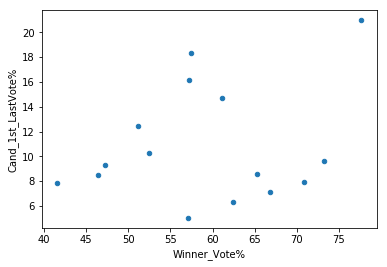

In [193]:
P_19.query('Ward==4').plot.scatter(x='Winner_Vote%',y='Cand_1st_LastVote%')

In [204]:
P_19.columns

Index(['Ward', 'Precinct', 'Reg_Vote_10/1/19', 'Reg_Vote_11/7/19',
       'VoterReg_Election', 'Tot_Early/Absentee_Vote', 'Early/Abs_Vote%',
       'Total_Vote', 'LastCouncil_Vote%', 'Tot_Vote%',
       ...
       'Total_WardVotes', 'Total_WardRegistered', 'Projected_Weight',
       'Actual_Weight', 'Representation', 'C_Projected_Weight',
       'T_Actual_Weight', 'T_Representation', 'S_Actual_Weight',
       'S_Representation'],
      dtype='object', length=109)

#### Additional Graphs for Reporting

In [222]:
#Map City Council Results

def map_2019_SP_WeightSurplus_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','Cand_1st_WeightTotal_3rdRankSurplus'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +' Winning Candidate Weighted3rdRankedSurplus',
        highlight= True
    )
                             
    # display map
    return SP_map

In [223]:
map_2019_SP_WeightSurplus_byPrecinct()

In [219]:
#Map City Council Results

def map_2019_SP_TotalSurplus_byPrecinct(Ward=0):
    #setup
    sp_geo = r'Shapefiles/SaintPaul_VotingPrecincts.json'
    
    
    if Ward==0:
        B=P_19
        A='City Council'
        zo= 12
    else: 
        B= P_19[(P_19['Ward'] == Ward)]
        A= 'Ward ' + str(Ward) +' '
        zo=13
    
    
    #Set up Variable Zoom Locations
    data = [[0, [44.948530, -93.096058]], [1, [44.958326, -93.122926]], [2, [44.933159, -93.115535]], [3, [44.918270, -93.176131]], [4, [44.961494, -93.176991]], [5, [44.978117, -93.106602]], [6, [44.978945, -93.047281]], [7, [44.942040, -93.033178]]] 

    #44.951655, -93.096323
    
    # Create the pandas DataFrame 
    Loc = pd.DataFrame(data, columns = ['Ward', 'Location']) 
    Loc.iloc[Ward,1:]
    
    
    # generate a new map
    SP_map = folium.Map(location=Loc.iloc[Ward,1], zoom_start=zo,tiles='OpenStreetMap') #tiles="OpenStreetMap")

    SP_map.choropleth(
        geo_data=sp_geo,
        data=B,
        columns=['Precinct','Cand_1st_RankedSurplus%'],
        key_on="feature.properties.Precinct",
        fill_color='YlOrRd', 
        fill_opacity=0.7, 
        line_opacity=0.2,
        legend_name='2019 Saint Paul ' + A +' Winning Candidate RankedBallot Surplus%',
        highlight= True
    )
                             
    # display map
    return SP_map

In [220]:
map_2019_SP_TotalSurplus_byPrecinct()